In [1]:
import pandas as pd
import numpy as np
#import tiingo
import requests


In [2]:
### First we will get the 15min time intervals and calculate the 15min Moving averages (10 perido, 20 period, 50 period)
### From the same data we will also calculate the 1d Moving averages (10 period, 20 period, 50 period) and
### Append the indicators to the dataframe 
### Each iteration will run for a single ticker


### The data extracts work in 0GMT => Exchange opens at 14:30 and closes at 21:00
### Convert this to Sofia/New-York time if needed


In [3]:

headers = {
    'Content-Type': 'application/json'
}
requestResponse = requests.get("https://api.tiingo.com/iex/spy/prices?startDate=2019-01-02&resampleFreq=15min&columns=open,high,low,close,volume&token=0ed744c7db5ef348139953912e2f3cee79f4608b", headers=headers)
#print(requestResponse.json())

In [4]:
requestResponse = requests.get("https://api.tiingo.com/tiingo/fundamentals/msft/statements?token=0ed744c7db5ef348139953912e2f3cee79f4608b", headers=headers)
print(requestResponse.json)

<bound method Response.json of <Response [200]>>


In [5]:
df_stock = pd.DataFrame(requestResponse.json()) 

In [6]:
df_stock

,date,year,quarter,statementData
0,2022-03-31,2022,3,"{'cashFlow': [{'dataCode': 'freeCashFlow', 'va..."
1,2021-12-31,2022,2,"{'incomeStatement': [{'dataCode': 'epsDil', 'v..."
2,2021-09-30,2022,1,{'incomeStatement': [{'dataCode': 'grossProfit...
3,2021-06-30,2021,4,"{'balanceSheet': [{'dataCode': 'deferredRev', ..."
4,2021-06-30,2021,0,"{'cashFlow': [{'dataCode': 'payDiv', 'value': ..."
5,2021-03-31,2021,3,{'balanceSheet': [{'dataCode': 'liabilitiesNon...
6,2020-12-31,2021,2,{'incomeStatement': [{'dataCode': 'nonControll...
7,2020-09-30,2021,1,{'cashFlow': [{'dataCode': 'investmentsAcqDisp...
8,2020-06-30,2020,4,"{'incomeStatement': [{'dataCode': 'taxExp', 'v..."
9,2020-06-30,2020,0,"{'incomeStatement': [{'dataCode': 'ebit', 'val..."


In [7]:
df_stock["statementData"][3]

{'balanceSheet': [{'dataCode': 'deferredRev', 'value': 44141000000.0},
  {'dataCode': 'taxLiabilities', 'value': 29562000000.0},
  {'dataCode': 'liabilitiesNonCurrent', 'value': 103134000000.0},
  {'dataCode': 'acctPay', 'value': 15163000000.0},
  {'dataCode': 'inventory', 'value': 2636000000.0},
  {'dataCode': 'retainedEarnings', 'value': 57055000000.0},
  {'dataCode': 'equity', 'value': 141988000000.0},
  {'dataCode': 'debt', 'value': 67775000000.0},
  {'dataCode': 'assetsCurrent', 'value': 184406000000.0},
  {'dataCode': 'taxAssets', 'value': 0.0},
  {'dataCode': 'investmentsCurrent', 'value': 0.0},
  {'dataCode': 'sharesBasic', 'value': 7531574551.0},
  {'dataCode': 'investments', 'value': 5984000000.0},
  {'dataCode': 'liabilitiesCurrent', 'value': 88657000000.0},
  {'dataCode': 'acctRec', 'value': 38043000000.0},
  {'dataCode': 'intangibles', 'value': 57511000000.0},
  {'dataCode': 'totalAssets', 'value': 333779000000.0},
  {'dataCode': 'assetsNonCurrent', 'value': 149373000000.0

In [8]:
### Create a database of unwanted dates i.e. when the exchange was halted due to
### public holidays, etc. for data pre-processing

dates_to_exclude = pd.to_datetime(['2021-02-15',
                    '2021-04-02',
                    '2021-05-31',
                    '2021-07-05',
                    '2021-09-06',
                    '2021-11-25',
                    '2021-12-24',
                    '2022-01-17',
                    '2022-02-21',
                    '2022-04-15',
                    '2022-05-30',
                    '2022-06-20',
                    '2022-07-04'])
# Create an empty list
unwanted_dates = []

for x in dates_to_exclude:
    print("Day excluded due to public holdiay:",x.date())
    unwanted_dates.append(x.date())

Day excluded due to public holdiay: 2021-02-15
Day excluded due to public holdiay: 2021-04-02
Day excluded due to public holdiay: 2021-05-31
Day excluded due to public holdiay: 2021-07-05
Day excluded due to public holdiay: 2021-09-06
Day excluded due to public holdiay: 2021-11-25
Day excluded due to public holdiay: 2021-12-24
Day excluded due to public holdiay: 2022-01-17
Day excluded due to public holdiay: 2022-02-21
Day excluded due to public holdiay: 2022-04-15
Day excluded due to public holdiay: 2022-05-30
Day excluded due to public holdiay: 2022-06-20
Day excluded due to public holdiay: 2022-07-04


In [9]:
def df_stock_preprocessing(df_input):
    # Convert the date to pandas datetime very important
    df_input.date = pd.to_datetime(df_input.date)
    # Clear public holidays
    df_input = df_input[~df_input.date.dt.date.isin(unwanted_dates)]
    return df_input


def calculate_datetimes(df_input):
    df_input = df_input.sort_values(['date'])
    
    df_input['year'] = df_input.date.dt.year
    df_input['month'] = df_input.date.dt.month
    df_input['day'] = df_input.date.dt.day
    df_input['hour'] = df_input.date.dt.hour
    df_input['mins'] = df_input.date.dt.minute
    
    return df_input



In [10]:
# Execute the function to get clean date without the public holidays
df_stock = df_stock_preprocessing(df_stock)
# Execute the function to get columns for year, month, day, hour and mins
df_stock = calculate_datetimes(df_stock)


In [11]:
df_stock

,date,year,quarter,statementData,month,day,hour,mins
12,2019-09-30,2019,1,"{'balanceSheet': [{'dataCode': 'deposits', 'va...",9,30,0,0
11,2019-12-31,2019,2,"{'cashFlow': [{'dataCode': 'depamor', 'value':...",12,31,0,0
10,2020-03-31,2020,3,"{'incomeStatement': [{'dataCode': 'ebt', 'valu...",3,31,0,0
8,2020-06-30,2020,4,"{'incomeStatement': [{'dataCode': 'taxExp', 'v...",6,30,0,0
9,2020-06-30,2020,0,"{'incomeStatement': [{'dataCode': 'ebit', 'val...",6,30,0,0
7,2020-09-30,2020,1,{'cashFlow': [{'dataCode': 'investmentsAcqDisp...,9,30,0,0
6,2020-12-31,2020,2,{'incomeStatement': [{'dataCode': 'nonControll...,12,31,0,0
5,2021-03-31,2021,3,{'balanceSheet': [{'dataCode': 'liabilitiesNon...,3,31,0,0
3,2021-06-30,2021,4,"{'balanceSheet': [{'dataCode': 'deferredRev', ...",6,30,0,0
4,2021-06-30,2021,0,"{'cashFlow': [{'dataCode': 'payDiv', 'value': ...",6,30,0,0


In [10]:
# Check for the days with zero volume in order to remove them from the database i.e. public holidays, etc.
#x = df_stock[df_stock['volume']==0].groupby(['year','month','day']).volume.value_counts()
#x.to_csv('zero_days.csv')

In [11]:
combined_df = df_stock

In [12]:
combined_df

,date,open,high,low,close,volume,year,month,day,hour,mins
0,2021-02-12 18:45:00+00:00,391.025,391.085,390.640,390.850,14003.0,2021,2,12,18,45
1,2021-02-12 19:00:00+00:00,390.855,390.890,390.540,390.665,14046.0,2021,2,12,19,0
2,2021-02-12 19:15:00+00:00,390.660,390.935,390.540,390.905,10690.0,2021,2,12,19,15
3,2021-02-12 19:30:00+00:00,390.910,390.960,390.630,390.860,8363.0,2021,2,12,19,30
4,2021-02-12 19:45:00+00:00,390.855,391.195,390.810,391.105,10639.0,2021,2,12,19,45
...,...,...,...,...,...,...,...,...,...,...,...
9995,2022-07-15 19:00:00+00:00,384.350,384.640,384.055,384.340,28555.0,2022,7,15,19,0
9996,2022-07-15 19:15:00+00:00,384.300,384.550,384.025,384.140,60400.0,2022,7,15,19,15
9997,2022-07-15 19:30:00+00:00,384.155,384.385,383.605,384.350,90157.0,2022,7,15,19,30
9998,2022-07-15 19:45:00+00:00,384.350,385.245,383.590,385.090,184251.0,2022,7,15,19,45


In [13]:
hourly_df = combined_df.groupby(['year','month','day','hour']).last().reset_index()
hourly_df.close = hourly_df.close.shift(1)
hourly_df['hour_ma10'] = hourly_df.close.rolling(window=10).mean()
hourly_df['hour_ma20'] = hourly_df.close.rolling(window=20).mean()
hourly_df['hour_ma50'] = hourly_df.close.rolling(window=50).mean()

In [14]:
hourly_df

,year,month,day,hour,date,open,high,low,close,volume,mins,hour_ma10,hour_ma20,hour_ma50
0,2021,2,12,18,2021-02-12 18:45:00+00:00,391.025,391.085,390.640,NaN,14003.0,45,NaN,NaN,NaN
1,2021,2,12,19,2021-02-12 19:45:00+00:00,390.855,391.195,390.810,390.850,10639.0,45,NaN,NaN,NaN
2,2021,2,12,20,2021-02-12 20:45:00+00:00,391.875,392.900,391.830,391.105,215179.0,45,NaN,NaN,NaN
3,2021,2,12,21,2021-02-12 21:00:00+00:00,392.680,393.000,392.645,392.690,1015.0,0,NaN,NaN,NaN
4,2021,2,16,14,2021-02-16 14:45:00+00:00,394.075,394.195,393.640,392.940,24794.0,45,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2855,2022,7,15,16,2022-07-15 16:45:00+00:00,383.695,384.045,383.505,384.045,18512.0,45,378.0470,378.51700,383.1914
2856,2022,7,15,17,2022-07-15 17:45:00+00:00,384.535,384.630,383.890,383.750,51981.0,45,379.1840,378.67125,383.1202
2857,2022,7,15,18,2022-07-15 18:45:00+00:00,384.485,384.810,384.280,384.185,38346.0,45,380.0385,379.00350,383.0470
2858,2022,7,15,19,2022-07-15 19:45:00+00:00,384.350,385.245,383.590,384.370,184251.0,45,381.0845,379.24575,382.9729


In [15]:
df_stock.close.shift(1).rolling(window=10).mean()

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
9995    384.2425
9996    384.3015
9997    384.3405
9998    384.3590
9999    384.4105
Name: close, Length: 9649, dtype: float64

In [12]:
#### PERFORMANCE 
def df_ind_fast_calc(df_input):
    combined_df = df_input
    combined_df['ema_21'] = combined_df.close.ewm(span=21,adjust=False,min_periods=21).mean()
    # MA
    combined_df['ma10'] = combined_df.close.rolling(window=10).mean()
    combined_df['ma20'] = combined_df.close.rolling(window=20).mean()
    combined_df['ma50'] = combined_df.close.rolling(window=50).mean()
    
    
    # What happens next periods?
    combined_df['close1p_lead'] = combined_df.close.shift(-1)
    combined_df['close2p_lead'] = combined_df.close.shift(-2)
    combined_df['close3p_lead'] = combined_df.close.shift(-3)
    combined_df['close4p_lead'] = combined_df.close.shift(-4)
    combined_df['close5p_lead'] = combined_df.close.shift(-5)
    combined_df['close6p_lead'] = combined_df.close.shift(-6)
    combined_df['close7p_lead'] = combined_df.close.shift(-7)
    combined_df['close8p_lead'] = combined_df.close.shift(-8)
    combined_df['close16p_lead'] = combined_df.close.shift(-16)


    # Calculate the daily open for TODAY the stock and then join with the other dataframe based on year, month and day
    daily_open_df = combined_df.groupby(['year','month','day']).first().reset_index()
    daily_open_df = daily_open_df[['year','month','day','open']]
    daily_open_df = daily_open_df.set_axis(['year','month','day','daily_open'], axis=1, inplace=False)  
    combined_df= pd.merge(combined_df,daily_open_df,on=['year','month','day'],how='left')
    
    ### Pending question - can the low for today and high be calculated - because its moving for each row??? calc pwr?? 
    
    # Calculate the OPEN from YESTERDAY for the stock and then join with the other dataframe based on year,month and day
    yesterday_open_df = combined_df.groupby(['year','month','day']).first().shift(1).reset_index()
    yesterday_open_df = yesterday_open_df[['year','month','day','open']]
    yesterday_open_df = yesterday_open_df.set_axis(['year','month','day','yesterday_open'], axis=1, inplace=False)  
    combined_df= pd.merge(combined_df,yesterday_open_df,on=['year','month','day'],how='left')
    # Calculate the CLOSE from YESTERDAY for the stock and then join with the other dataframe based on year,month and day
    yesterday_close_df = combined_df.groupby(['year','month','day']).last().shift(1).reset_index()
    yesterday_close_df = yesterday_close_df[['year','month','day','close']]
    yesterday_close_df = yesterday_close_df.set_axis(['year','month','day','yesterday_close'], axis=1, inplace=False)  
    combined_df= pd.merge(combined_df,yesterday_close_df,on=['year','month','day'],how='left')
    # Yesterday LOW
    daily_low_df = combined_df.groupby(['year','month','day']).low.min().shift(1).reset_index()
    daily_low_df = daily_low_df.set_axis(['year','month','day','yesterday_low'], axis=1, inplace=False)
    combined_df = pd.merge(combined_df,daily_low_df,on=['year','month','day'],how='left')
    # Yesterday HIGH
    daily_high_df = combined_df.groupby(['year','month','day']).high.max().shift(1).reset_index()
    daily_high_df = daily_high_df.set_axis(['year','month','day','yesterday_high'], axis=1, inplace=False)
    combined_df = pd.merge(combined_df,daily_high_df,on=['year','month','day'],how='left')
    
    
    # Stock open for the day
    open_for_the_day_df = combined_df.groupby(['year','month','day']).first().reset_index()
    open_for_the_day_df = open_for_the_day_df[['year','month','day','open']]
    open_for_the_day_df = open_for_the_day_df.set_axis(['year','month','day','open_for_the_day'], axis=1, inplace=False)  
    combined_df= pd.merge(combined_df,open_for_the_day_df,on=['year','month','day'],how='left')
    # Stock close for the day
    close_for_the_day_df = combined_df.groupby(['year','month','day']).last().reset_index()
    close_for_the_day_df = close_for_the_day_df[['year','month','day','close']]
    close_for_the_day_df = close_for_the_day_df.set_axis(['year','month','day','close_for_the_day'], axis=1, inplace=False)  
    combined_df= pd.merge(combined_df,close_for_the_day_df,on=['year','month','day'],how='left')
    
    
    ## Hourly
    hourly_df = combined_df.groupby(['year','month','day','hour']).last().reset_index()
    hourly_df.close = hourly_df.close.shift(1)
    hourly_df['hour_ma10'] = hourly_df.close.rolling(window=10).mean()
    hourly_df['hour_ma20'] = hourly_df.close.rolling(window=20).mean()
    hourly_df['hour_ma50'] = hourly_df.close.rolling(window=50).mean()
    hourly_df = hourly_df[['year','month','day','hour','hour_ma10','hour_ma20','hour_ma50']]
    #hourly_ma = hourly_ma.set_axis(['year','month','day','hourly_ma'], axis=1, inplace=False)  
    combined_df= pd.merge(combined_df,hourly_df,on=['year','month','day','hour'],how='left')
    
       
    ## Daily
    daily_df = combined_df.groupby(['year','month','day']).last().reset_index()
    daily_df['close_day_minus1'] = daily_df.close.shift(1)
    daily_df['close_day_minus2'] = daily_df.close.shift(2)
    daily_df['close_day_minus3'] = daily_df.close.shift(3)
    daily_df['close_day_minus5'] = daily_df.close.shift(5)
    daily_df['close_day_minus10'] = daily_df.close.shift(10)
    daily_df['close_day_minus15'] = daily_df.close.shift(15)
    daily_df = daily_df[['year','month','day','close_day_minus1','close_day_minus2','close_day_minus3','close_day_minus5',
                        'close_day_minus10','close_day_minus15']]                                
    #hourly_ma = hourly_ma.set_axis(['year','month','day','hourly_ma'], axis=1, inplace=False)  
    combined_df= pd.merge(combined_df,daily_df,on=['year','month','day'],how='left')
    
   
    
    
      
    ## How things are calculated to percent depends on the variables - pay attention is it 100 - x/y*100 or x/y*100 -100!!!
    ## It depends which event occurs first it the timeline
    
    ### 
    combined_df["ema_21"] = combined_df.close/combined_df["ema_21"]*100 -100
    combined_df["ma10"] =  combined_df.close/combined_df["ma10"]*100-100
    combined_df["ma20"] =  combined_df.close/combined_df["ma20"]*100-100
    combined_df["ma50"] =  combined_df.close/combined_df["ma50"]*100-100
    combined_df["close1p_lead"] = 100 - combined_df.close/combined_df["close1p_lead"]*100
    combined_df["close2p_lead"] = 100 - combined_df.close/combined_df["close2p_lead"]*100
    combined_df["close3p_lead"] = 100 - combined_df.close/combined_df["close3p_lead"]*100
    combined_df["close4p_lead"] = 100 - combined_df.close/combined_df["close4p_lead"]*100
    combined_df["close5p_lead"] = 100 - combined_df.close/combined_df["close5p_lead"]*100
    combined_df["close6p_lead"] = 100 - combined_df.close/combined_df["close6p_lead"]*100
    combined_df["close7p_lead"] = 100 - combined_df.close/combined_df["close7p_lead"]*100
    combined_df["close8p_lead"] = 100 - combined_df.close/combined_df["close8p_lead"]*100
    combined_df["close16p_lead"] = 100 - combined_df.close/combined_df["close16p_lead"]*100
    
    
    combined_df["daily_open"] = combined_df.close/combined_df["daily_open"]*100 - 100
    combined_df["yesterday_open"] = combined_df.close/combined_df["yesterday_open"]*100 - 100
    combined_df["yesterday_close"] = combined_df.close/combined_df["yesterday_close"]*100 - 100
    combined_df["yesterday_low"] = combined_df.close/combined_df["yesterday_low"]*100 - 100
    combined_df["yesterday_high"] = combined_df.close/combined_df["yesterday_high"]*100 - 100
    combined_df["open_for_the_day"] = combined_df.close/combined_df["open_for_the_day"]*100 - 100
    combined_df["close_for_the_day"] = 100 - combined_df.close/combined_df["close_for_the_day"]*100
    
    combined_df["hour_ma10"] =  combined_df.close/combined_df["hour_ma10"]*100-100
    combined_df["hour_ma20"] =  combined_df.close/combined_df["hour_ma20"]*100-100
    combined_df["hour_ma50"] =  combined_df.close/combined_df["hour_ma50"]*100-100
    
    
    # How % is now close compared to close 1 day ago, 2 days ago etc. 
    combined_df['close_day_minus1'] = combined_df.close/combined_df['close_day_minus1']*100-100
    combined_df['close_day_minus2'] = combined_df.close/combined_df['close_day_minus2']*100-100
    combined_df['close_day_minus3'] = combined_df.close/combined_df['close_day_minus3']*100-100
    combined_df['close_day_minus5'] = combined_df.close/combined_df['close_day_minus5']*100-100
    combined_df['close_day_minus10'] = combined_df.close/combined_df['close_day_minus10']*100-100
    combined_df['close_day_minus15'] = combined_df.close/combined_df['close_day_minus15']*100-100


    #print(combined_df.columns)

    #print(daily_low_df)

    #print('swag')
    
    #print(yesterday_open_df)
    #print('swag')
    
    #print(yesterday_close_df)
    return combined_df


In [25]:
df_stock

,date,open,high,low,close,volume,year,month,day,hour,...,ma50,close1p_lead,close2p_lead,close3p_lead,close4p_lead,close5p_lead,close6p_lead,close7p_lead,close8p_lead,close16p_lead
0,2021-02-12 18:45:00+00:00,391.025,391.085,390.640,390.850,14003.0,2021,2,12,18,...,NaN,390.665,390.905,390.860,391.105,391.280,391.405,391.890,392.690,392.950
1,2021-02-12 19:00:00+00:00,390.855,390.890,390.540,390.665,14046.0,2021,2,12,19,...,NaN,390.905,390.860,391.105,391.280,391.405,391.890,392.690,392.940,392.590
2,2021-02-12 19:15:00+00:00,390.660,390.935,390.540,390.905,10690.0,2021,2,12,19,...,NaN,390.860,391.105,391.280,391.405,391.890,392.690,392.940,394.075,392.725
3,2021-02-12 19:30:00+00:00,390.910,390.960,390.630,390.860,8363.0,2021,2,12,19,...,NaN,391.105,391.280,391.405,391.890,392.690,392.940,394.075,393.695,392.065
4,2021-02-12 19:45:00+00:00,390.855,391.195,390.810,391.105,10639.0,2021,2,12,19,...,NaN,391.280,391.405,391.890,392.690,392.940,394.075,393.695,393.035,392.380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2022-07-15 19:00:00+00:00,384.350,384.640,384.055,384.340,28555.0,2022,7,15,19,...,379.1394,384.140,384.350,385.090,385.025,NaN,NaN,NaN,NaN,NaN
9996,2022-07-15 19:15:00+00:00,384.300,384.550,384.025,384.140,60400.0,2022,7,15,19,...,379.3838,384.350,385.090,385.025,NaN,NaN,NaN,NaN,NaN,NaN
9997,2022-07-15 19:30:00+00:00,384.155,384.385,383.605,384.350,90157.0,2022,7,15,19,...,379.6244,385.090,385.025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,2022-07-15 19:45:00+00:00,384.350,385.245,383.590,385.090,184251.0,2022,7,15,19,...,379.8927,385.025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
x =df_ind_fast_calc(df_stock)

In [29]:
x

,date,open,high,low,close,volume,year,month,day,hour,...,close_for_the_day,hour_ma10,hour_ma20,hour_ma50,close_day_minus1,close_day_minus2,close_day_minus3,close_day_minus5,close_day_minus10,close_day_minus15
0,2021-02-12 18:45:00+00:00,391.025,391.085,390.640,390.850,14003.0,2021,2,12,18,...,0.531888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-12 19:00:00+00:00,390.855,390.890,390.540,390.665,14046.0,2021,2,12,19,...,0.578969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-02-12 19:15:00+00:00,390.660,390.935,390.540,390.905,10690.0,2021,2,12,19,...,0.517891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-02-12 19:30:00+00:00,390.910,390.960,390.630,390.860,8363.0,2021,2,12,19,...,0.529343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-02-12 19:45:00+00:00,390.855,391.195,390.810,391.105,10639.0,2021,2,12,19,...,0.466992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9644,2022-07-15 19:00:00+00:00,384.350,384.640,384.055,384.340,28555.0,2022,7,15,19,...,0.177911,0.854272,1.343258,0.356970,1.644980,1.427704,0.965416,-1.136948,1.960472,1.755315
9645,2022-07-15 19:15:00+00:00,384.300,384.550,384.025,384.140,60400.0,2022,7,15,19,...,0.229855,0.801791,1.290522,0.304747,1.592087,1.374924,0.912876,-1.188394,1.907415,1.702364
9646,2022-07-15 19:30:00+00:00,384.155,384.385,383.605,384.350,90157.0,2022,7,15,19,...,0.175313,0.856897,1.345895,0.359582,1.647625,1.430343,0.968043,-1.134376,1.963125,1.757962
9647,2022-07-15 19:45:00+00:00,384.350,385.245,383.590,385.090,184251.0,2022,7,15,19,...,-0.016882,1.051079,1.541019,0.552807,1.843330,1.625630,1.162439,-0.944027,2.159438,1.953880


In [30]:
x.to_csv('bdin_now.csv')

In [31]:
x.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'year', 'month',
       'day', 'hour', 'mins', 'ema_21', 'ma10', 'ma20', 'ma50', 'close1p_lead',
       'close2p_lead', 'close3p_lead', 'close4p_lead', 'close5p_lead',
       'close6p_lead', 'close7p_lead', 'close8p_lead', 'close16p_lead',
       'daily_open', 'yesterday_open', 'yesterday_close', 'yesterday_low',
       'yesterday_high', 'open_for_the_day', 'close_for_the_day', 'hour_ma10',
       'hour_ma20', 'hour_ma50', 'close_day_minus1', 'close_day_minus2',
       'close_day_minus3', 'close_day_minus5', 'close_day_minus10',
       'close_day_minus15'],
      dtype='object')

In [54]:
sector_etf = pd.read_excel ('C:/Users/IvanIvanov/Documents/BDIN/data/sector_list.xlsx', sheet_name='etf_list')
print (sector_etf)



   Ticker          Sector
0     XLK      Technology
1     XLV      Healthcare
2     XLU       Utilities
3     XLY   Cdiscetionary
4     XLP        Cstaples
5     XLB       Materials
6     XLI     Industrials
7    XLRE      RealEstate
8     XLF      Financials
9     XLE          Energy
10    XLC  Communications
11    SPY    AllMarket500


In [55]:
etf_list = list(sector_etf['Ticker'].values)

In [56]:
etf_list

['XLK',
 'XLV',
 'XLU',
 'XLY',
 'XLP',
 'XLB',
 'XLI',
 'XLRE',
 'XLF',
 'XLE',
 'XLC',
 'SPY']

In [57]:
# Load the companies and filter the big cap
big_cap = pd.read_excel("C:/Users/IvanIvanov/Documents/BDIN/data/big_cap.xlsx")
ticker_list = big_cap[big_cap['Market Cap']>4200000000]["Ticker"].to_list() # filter out only stocks with nice cap

In [58]:
etf_list = list(sector_etf['Ticker'].values)

etf_list.extend(ticker_list)

#ticker_list = etf_list[0:300]

In [59]:
len(ticker_list)

548

In [ ]:
df_daily_all = pd.DataFrame()

for ticker in ticker_list[471:]:
    
    requestResponse = requests.get("https://api.tiingo.com/iex/"+ticker+"/prices?startDate=2019-01-02&resampleFreq=15min&columns=open,high,low,close,volume&token=0ed744c7db5ef348139953912e2f3cee79f4608b", headers=headers)
    df_stock = pd.DataFrame(requestResponse.json()) 
    print(df_stock.head())
    print(ticker)

    df_stock['ticker']=ticker
    df_daily_all = df_daily_all.append(df_stock)



In [60]:
ticker_list.remove('GSK')
ticker_list.remove('LVGO')



In [69]:
ticker_list.remove('HTA')


In [70]:
df_daily_all = pd.DataFrame()

for ticker in ticker_list:
    
    requestResponse = requests.get("https://api.tiingo.com/iex/"+ticker+"/prices?startDate=2019-01-02&resampleFreq=15min&columns=open,high,low,close,volume&token=0ed744c7db5ef348139953912e2f3cee79f4608b", headers=headers)
    df_stock = pd.DataFrame(requestResponse.json()) 
    print(df_stock.head())
    print(ticker)
    df_stock['ticker']=ticker

        # Execute the function to get clean date without the public holidays
    df_stock = df_stock_preprocessing(df_stock)
    # Execute the function to get columns for year, month, day, hour and mins
    df_stock = calculate_datetimes(df_stock)
    df_stock = df_ind_fast_calc(df_stock)
    
    df_daily_all = df_daily_all.append(df_stock)



                       date     open     high      low    close   volume
0  2021-02-17T18:45:00.000Z  130.425  130.655  130.380  130.490  23712.0
1  2021-02-17T19:00:00.000Z  130.510  130.720  130.510  130.590  40393.0
2  2021-02-17T19:15:00.000Z  130.595  130.625  130.315  130.380  30759.0
3  2021-02-17T19:30:00.000Z  130.360  130.450  130.260  130.435  34364.0
4  2021-02-17T19:45:00.000Z  130.445  130.690  130.345  130.345  35829.0
AAPL
                       date     open    high      low    close   volume
0  2021-02-17T18:30:00.000Z  243.330  243.35  243.040  243.210  16542.0
1  2021-02-17T18:45:00.000Z  243.200  243.39  242.955  243.150  16581.0
2  2021-02-17T19:00:00.000Z  243.145  243.78  243.145  243.620  34120.0
3  2021-02-17T19:15:00.000Z  243.620  243.73  243.265  243.335  22730.0
4  2021-02-17T19:30:00.000Z  243.375  243.42  243.070  243.420  15738.0
MSFT
                       date     open      high       low     close  volume
0  2021-02-17T18:45:00.000Z  3316.86  3316.99

                       date     open     high     low    close  volume
0  2021-02-17T18:30:00.000Z  490.075  490.075  489.07  489.150  7737.0
1  2021-02-17T18:45:00.000Z  489.045  489.640  488.24  488.665  3724.0
2  2021-02-17T19:00:00.000Z  489.305  489.590  488.99  489.340  2473.0
3  2021-02-17T19:15:00.000Z  488.700  489.450  487.79  487.790  3009.0
4  2021-02-17T19:30:00.000Z  487.830  487.860  487.11  487.590  2465.0
ADBE
                       date     open     high      low   close  volume
0  2021-02-17T18:45:00.000Z  187.120  187.140  186.330  186.33  6387.0
1  2021-02-17T19:00:00.000Z  186.540  186.890  186.475  186.53  3946.0
2  2021-02-17T19:15:00.000Z  186.605  186.605  185.925  186.00  6162.0
3  2021-02-17T19:30:00.000Z  186.060  186.300  185.980  186.16  4143.0
4  2021-02-17T19:45:00.000Z  186.115  186.325  186.060  186.26  3719.0
DIS
                       date     open     high      low    close  volume
0  2021-02-17T18:30:00.000Z  247.490  247.670  247.325  247.395  55

                       date     open    high      low    close  volume
0  2021-02-17T18:30:00.000Z  213.185  213.26  213.080  213.210  4592.0
1  2021-02-17T18:45:00.000Z  213.220  213.33  213.135  213.135  2789.0
2  2021-02-17T19:00:00.000Z  213.175  213.30  212.965  212.965  3538.0
3  2021-02-17T19:15:00.000Z  213.050  213.11  212.860  213.005  1851.0
4  2021-02-17T19:30:00.000Z  213.000  213.20  212.895  213.150  3648.0
MCD
                       date    open     high     low    close   volume
0  2021-02-17T18:30:00.000Z  106.52  106.580  106.44  106.555   7998.0
1  2021-02-17T18:45:00.000Z  106.57  106.660  106.51  106.600   7821.0
2  2021-02-17T19:00:00.000Z  106.62  106.705  106.53  106.530  11727.0
3  2021-02-17T19:15:00.000Z  106.55  106.610  106.45  106.500   6927.0
4  2021-02-17T19:30:00.000Z  106.50  106.500  106.29  106.320  15806.0
ABBV
                       date     open     high      low    close  volume
0  2021-02-17T18:30:00.000Z  259.240  259.240  258.695  258.700  25

                       date     open     high     low    close  volume
0  2021-02-17T18:30:00.000Z  178.325  178.355  177.89  178.005  3161.0
1  2021-02-17T18:45:00.000Z  177.970  178.280  177.92  178.180  4961.0
2  2021-02-17T19:00:00.000Z  178.220  178.700  178.21  178.270  4084.0
3  2021-02-17T19:15:00.000Z  178.280  178.430  177.98  178.000  3749.0
4  2021-02-17T19:30:00.000Z  177.985  178.525  177.93  178.455  4922.0
TXN
                       date    open     high      low    close  volume
0  2021-02-17T18:30:00.000Z  248.32  248.670  248.160  248.450  3486.0
1  2021-02-17T18:45:00.000Z  248.45  248.490  248.120  248.450  3642.0
2  2021-02-17T19:00:00.000Z  248.50  248.935  248.450  248.655  3180.0
3  2021-02-17T19:15:00.000Z  248.65  248.650  248.365  248.400  6594.0
4  2021-02-17T19:30:00.000Z  248.38  248.550  247.990  248.210  2599.0
LIN
                       date     open     high      low    close  volume
0  2021-02-17T18:30:00.000Z  175.890  176.275  175.860  176.255  319

                       date    open    high     low   close   volume
0  2021-02-17T18:30:00.000Z  23.440  23.470  23.405  23.465   5570.0
1  2021-02-17T18:45:00.000Z  23.465  23.505  23.420  23.485   5640.0
2  2021-02-17T19:00:00.000Z  23.480  23.495  23.440  23.470   7584.0
3  2021-02-17T19:15:00.000Z  23.470  23.495  23.455  23.490   7360.0
4  2021-02-17T19:30:00.000Z  23.485  23.550  23.485  23.540  16343.0
BP
                       date     open    high      low    close  volume
0  2021-02-17T18:30:00.000Z  420.130  420.13  419.240  419.240   976.0
1  2021-02-17T18:45:00.000Z  419.240  419.58  418.690  418.690  2697.0
2  2021-02-17T19:00:00.000Z  419.010  419.17  418.505  418.505  2036.0
3  2021-02-17T19:15:00.000Z  418.450  418.45  416.680  416.840  1070.0
4  2021-02-17T19:30:00.000Z  416.695  416.80  416.015  416.500  1810.0
INTU
                       date    open    high     low   close  volume
0  2021-02-17T18:30:00.000Z  64.550  64.605  64.520  64.580  2678.0
1  2021-02-17T18

                       date    open    high     low   close  volume
0  2021-02-17T18:30:00.000Z  78.285  78.315  78.195  78.225  3105.0
1  2021-02-17T18:45:00.000Z  78.220  78.280  78.200  78.205  3189.0
2  2021-02-17T19:00:00.000Z  78.205  78.365  78.205  78.320  3430.0
3  2021-02-17T19:15:00.000Z  78.340  78.345  78.240  78.280  4351.0
4  2021-02-17T19:30:00.000Z  78.275  78.385  78.260  78.385  2831.0
CL
                       date    open    high     low   close  volume
0  2021-02-17T18:45:00.000Z  71.915  72.005  71.875  71.940  4328.0
1  2021-02-17T19:00:00.000Z  71.940  71.990  71.870  71.900  4728.0
2  2021-02-17T19:15:00.000Z  71.890  72.030  71.870  72.020  2693.0
3  2021-02-17T19:30:00.000Z  72.030  72.100  71.970  72.095  1414.0
4  2021-02-17T19:45:00.000Z  72.110  72.265  72.105  72.230  1891.0
D
                       date     open     high      low    close  volume
0  2021-02-17T18:30:00.000Z  311.535  311.645  311.300  311.565  1607.0
1  2021-02-17T18:45:00.000Z  311.53

                       date     open     high      low    close  volume
0  2021-02-17T18:30:00.000Z  251.950  251.950  251.670  251.875   731.0
1  2021-02-17T18:45:00.000Z  251.915  252.305  251.775  252.210   763.0
2  2021-02-17T19:00:00.000Z  252.400  252.920  252.345  252.700  1086.0
3  2021-02-17T19:15:00.000Z  252.610  252.610  252.010  252.010  1788.0
4  2021-02-17T19:30:00.000Z  252.125  252.125  251.535  251.660  1956.0
NSC
                       date    open    high     low   close   volume
0  2021-02-17T18:30:00.000Z  37.600  37.655  37.560  37.585   8509.0
1  2021-02-17T18:45:00.000Z  37.585  37.720  37.575  37.655  10950.0
2  2021-02-17T19:00:00.000Z  37.650  37.665  37.585  37.595   7211.0
3  2021-02-17T19:15:00.000Z  37.595  37.600  37.425  37.455   7194.0
4  2021-02-17T19:30:00.000Z  37.455  37.495  37.455  37.485   6936.0
BSX
                       date    open    high     low   close   volume
0  2021-02-17T18:30:00.000Z  11.835  11.840  11.800  11.835  26222.0
1  2021-

                       date    open    high     low    close  volume
0  2021-02-17T18:45:00.000Z  227.92  228.20  227.77  228.060  1546.0
1  2021-02-17T19:00:00.000Z  228.14  228.80  228.14  228.560  2107.0
2  2021-02-17T19:15:00.000Z  228.63  228.70  228.25  228.260  1312.0
3  2021-02-17T19:30:00.000Z  228.28  228.30  227.80  228.210  1041.0
4  2021-02-17T19:45:00.000Z  228.17  228.53  228.08  228.475  1293.0
AON
                       date     open     high      low    close  volume
0  2021-02-17T18:30:00.000Z  586.165  586.165  584.580  584.610   301.0
1  2021-02-17T18:45:00.000Z  584.775  586.270  584.080  586.230  3002.0
2  2021-02-17T19:00:00.000Z  586.260  588.840  586.260  586.865  1873.0
3  2021-02-17T19:15:00.000Z  586.865  587.115  583.180  583.180  1775.0
4  2021-02-17T19:30:00.000Z  583.460  586.790  583.445  584.670  2678.0
LRCX
                       date    open    high     low   close  volume
0  2021-02-17T18:30:00.000Z  30.875  30.885  30.830  30.845  1038.0
1  2021-0

                       date     open     high      low    close  volume
0  2021-02-17T18:45:00.000Z  176.360  176.700  176.245  176.420  2222.0
1  2021-02-17T19:00:00.000Z  176.465  176.580  176.275  176.325  2237.0
2  2021-02-17T19:15:00.000Z  176.230  176.260  175.865  175.945  1712.0
3  2021-02-17T19:30:00.000Z  175.940  175.940  175.440  175.570  2060.0
4  2021-02-17T19:45:00.000Z  175.625  175.815  175.600  175.600  1062.0
HCA
                       date    open    high     low   close  volume
0  2021-02-17T18:30:00.000Z  78.520  78.520  78.375  78.385  1863.0
1  2021-02-17T18:45:00.000Z  78.380  78.530  78.325  78.355  1930.0
2  2021-02-17T19:00:00.000Z  78.355  78.470  78.330  78.345  2041.0
3  2021-02-17T19:15:00.000Z  78.350  78.415  78.290  78.310  3811.0
4  2021-02-17T19:30:00.000Z  78.305  78.385  78.225  78.340  2871.0
AEP
                       date    open     high     low    close  volume
0  2021-02-17T18:45:00.000Z  253.54  254.950  253.26  254.850  3622.0
1  2021-02-1

                       date    open    high     low   close   volume
0  2021-02-17T18:45:00.000Z  36.565  36.740  36.545  36.650  10661.0
1  2021-02-17T19:00:00.000Z  36.650  36.735  36.620  36.730   6736.0
2  2021-02-17T19:15:00.000Z  36.730  36.840  36.705  36.830   9634.0
3  2021-02-17T19:30:00.000Z  36.825  36.945  36.795  36.895   6175.0
4  2021-02-17T19:45:00.000Z  36.925  37.130  36.915  37.105   9563.0
KHC
                       date    open    high     low   close  volume
0  2021-02-17T18:30:00.000Z  61.050  61.100  61.030  61.055  1395.0
1  2021-02-17T18:45:00.000Z  61.040  61.060  60.935  60.935  1972.0
2  2021-02-17T19:00:00.000Z  60.955  61.035  60.935  61.020  1441.0
3  2021-02-17T19:15:00.000Z  61.005  61.085  60.955  60.960   429.0
4  2021-02-17T19:30:00.000Z  60.955  60.995  60.810  60.890  8056.0
XEL
                       date    open    high    low  close  volume
0  2021-02-17T18:30:00.000Z  58.440  58.570  58.39  58.52  1248.0
1  2021-02-17T18:45:00.000Z  58.405  5

                       date     open     high      low   close  volume
0  2021-02-17T18:30:00.000Z  236.040  236.540  235.785  236.49  1582.0
1  2021-02-17T18:45:00.000Z  236.290  237.685  236.045  237.44  2206.0
2  2021-02-17T19:00:00.000Z  237.600  237.770  237.150  237.22  1071.0
3  2021-02-17T19:15:00.000Z  237.095  237.150  235.840  235.94  2735.0
4  2021-02-17T19:30:00.000Z  235.940  236.480  235.820  235.99  2189.0
CRWD
                       date    open    high    low   close  volume
0  2021-02-17T18:30:00.000Z  49.420  49.435  49.28  49.395  6172.0
1  2021-02-17T18:45:00.000Z  49.395  49.400  49.22  49.220  6007.0
2  2021-02-17T19:00:00.000Z  49.235  49.480  49.23  49.470  5966.0
3  2021-02-17T19:15:00.000Z  49.480  49.630  49.47  49.525  7106.0
4  2021-02-17T19:30:00.000Z  49.455  49.520  49.41  49.450  6844.0
WBA
                       date     open     high      low    close  volume
0  2021-02-17T18:45:00.000Z  132.540  132.715  132.285  132.715  2939.0
1  2021-02-17T19:00

                       date     open    high     low   close  volume
0  2021-02-17T18:30:00.000Z  271.265  271.82  269.95  271.63  2603.0
1  2021-02-17T18:45:00.000Z  271.630  272.02  271.17  271.17  1651.0
2  2021-02-17T19:00:00.000Z  271.610  272.36  271.36  271.95  2206.0
3  2021-02-17T19:15:00.000Z  271.950  272.38  271.43  271.81  2142.0
4  2021-02-17T19:30:00.000Z  271.485  272.28  271.27  272.28  2132.0
W
                       date    open    high     low   close  volume
0  2021-02-17T18:45:00.000Z  89.150  89.295  89.010  89.010  2737.0
1  2021-02-17T19:00:00.000Z  89.020  89.390  89.020  89.140  4626.0
2  2021-02-17T19:15:00.000Z  89.185  89.210  88.990  89.060  3146.0
3  2021-02-17T19:30:00.000Z  89.075  89.075  88.910  88.965  4973.0
4  2021-02-17T19:45:00.000Z  88.970  89.140  88.945  89.115  4141.0
PAYX
                       date     open     high      low    close  volume
0  2021-02-17T18:30:00.000Z  148.465  148.465  148.255  148.255   110.0
1  2021-02-17T18:45:00.000Z

                       date    open    high     low   close  volume
0  2021-02-17T18:30:00.000Z  26.850  26.895  26.805  26.805  4693.0
1  2021-02-17T18:45:00.000Z  26.805  26.890  26.795  26.845  5158.0
2  2021-02-17T19:00:00.000Z  26.845  26.915  26.840  26.885  3755.0
3  2021-02-17T19:15:00.000Z  26.885  26.885  26.795  26.805  3840.0
4  2021-02-17T19:30:00.000Z  26.805  26.825  26.730  26.755  3735.0
TME
                       date    open    high     low   close  volume
0  2021-02-17T18:30:00.000Z  36.960  37.025  36.930  36.975  2330.0
1  2021-02-17T18:45:00.000Z  36.975  37.045  36.975  37.040  2971.0
2  2021-02-17T19:00:00.000Z  37.020  37.090  37.020  37.070  1707.0
3  2021-02-17T19:15:00.000Z  37.070  37.135  37.045  37.105  4466.0
4  2021-02-17T19:30:00.000Z  37.090  37.220  37.080  37.200  5068.0
CARR
                       date    open    high     low   close   volume
0  2021-02-17T18:30:00.000Z  50.850  50.850  50.640  50.700   6636.0
1  2021-02-17T18:45:00.000Z  50.700  

                       date     open    high     low   close  volume
0  2021-02-17T18:45:00.000Z  451.400  453.79  450.85  451.37  5825.0
1  2021-02-17T19:00:00.000Z  451.910  454.92  450.59  453.36  6883.0
2  2021-02-17T19:15:00.000Z  453.560  453.82  450.09  451.81  4194.0
3  2021-02-17T19:30:00.000Z  452.710  454.77  451.76  453.10  3796.0
4  2021-02-17T19:45:00.000Z  453.105  454.74  453.09  453.61  3926.0
ROKU
                       date    open    high     low   close  volume
0  2021-02-17T18:30:00.000Z  38.200  38.220  38.105  38.155  8032.0
1  2021-02-17T18:45:00.000Z  38.155  38.185  38.100  38.125  7537.0
2  2021-02-17T19:00:00.000Z  38.130  38.235  38.130  38.215  6920.0
3  2021-02-17T19:15:00.000Z  38.215  38.230  38.120  38.135  5229.0
4  2021-02-17T19:30:00.000Z  38.135  38.140  38.065  38.115  4766.0
GLW
                       date     open     high      low   close   volume
0  2021-02-17T18:30:00.000Z  113.925  113.925  113.435  113.45   3213.0
1  2021-02-17T18:45:00.00

                       date    open    high     low   close  volume
0  2021-02-17T18:30:00.000Z  41.620  41.640  41.540  41.550   621.0
1  2021-02-17T18:45:00.000Z  41.550  41.610  41.525  41.595   839.0
2  2021-02-17T19:00:00.000Z  41.630  41.690  41.580  41.600  2224.0
3  2021-02-17T19:15:00.000Z  41.595  41.595  41.510  41.565   500.0
4  2021-02-17T19:30:00.000Z  41.565  41.665  41.545  41.640   640.0
STM
                       date    open    high     low   close  volume
0  2021-02-17T18:30:00.000Z  57.770  57.850  57.765  57.800  3021.0
1  2021-02-17T18:45:00.000Z  57.800  57.820  57.660  57.680  1328.0
2  2021-02-17T19:00:00.000Z  57.685  57.825  57.675  57.760  1902.0
3  2021-02-17T19:15:00.000Z  57.780  57.845  57.745  57.845  2672.0
4  2021-02-17T19:30:00.000Z  57.845  57.855  57.590  57.715  3729.0
K
                       date    open    high     low   close   volume
0  2021-02-17T18:30:00.000Z  66.835  66.945  66.835  66.940   1417.0
1  2021-02-17T18:45:00.000Z  66.985  67.

                       date    open    high     low   close  volume
0  2021-02-17T18:30:00.000Z  51.785  51.785  51.590  51.625  5952.0
1  2021-02-17T18:45:00.000Z  51.615  51.720  51.615  51.700  4445.0
2  2021-02-17T19:00:00.000Z  51.720  51.920  51.695  51.860  4358.0
3  2021-02-17T19:15:00.000Z  51.860  51.935  51.710  51.760  5980.0
4  2021-02-17T19:30:00.000Z  51.765  51.895  51.765  51.860  3681.0
MPC
                       date     open     high      low    close  volume
0  2021-02-17T18:30:00.000Z  165.130  165.375  164.935  165.240  1741.0
1  2021-02-17T18:45:00.000Z  165.325  165.325  164.815  164.870   785.0
2  2021-02-17T19:00:00.000Z  165.010  165.330  165.010  165.190  1181.0
3  2021-02-17T19:15:00.000Z  165.190  165.275  164.935  164.935  1509.0
4  2021-02-17T19:30:00.000Z  164.920  165.530  164.900  165.530  1785.0
FTNT
                       date    open    high     low   close  volume
0  2021-02-17T18:30:00.000Z  56.630  56.685  56.610  56.610  4669.0
1  2021-02-17T1

                       date    open    high     low   close  volume
0  2021-02-17T18:30:00.000Z  91.760  91.940  91.740  91.925  3375.0
1  2021-02-17T18:45:00.000Z  91.940  92.000  91.730  91.930  2941.0
2  2021-02-17T19:00:00.000Z  91.945  92.455  91.945  92.020  6566.0
3  2021-02-17T19:15:00.000Z  91.830  91.990  91.670  91.730  5216.0
4  2021-02-17T19:30:00.000Z  91.745  91.850  91.590  91.760  2264.0
DFS
                       date    open    high     low  close  volume
0  2021-02-17T18:30:00.000Z  31.995  32.045  31.960  32.02  3455.0
1  2021-02-17T18:45:00.000Z  32.020  32.020  31.910  31.94  2253.0
2  2021-02-17T19:00:00.000Z  31.940  32.025  31.925  31.96  1774.0
3  2021-02-17T19:15:00.000Z  31.955  31.960  31.895  31.91  1174.0
4  2021-02-17T19:30:00.000Z  31.900  31.990  31.885  31.96  3395.0
FOXA
                       date     open     high      low    close  volume
0  2020-11-05T14:30:00.000Z  173.410  173.820  173.410  173.660  2319.0
1  2020-11-05T14:45:00.000Z  173.660 

                       date     open     high      low    close  volume
0  2020-11-05T14:30:00.000Z  131.060  131.135  131.045  131.110  2608.0
1  2020-11-05T14:45:00.000Z  131.115  131.180  131.115  131.155  2795.0
2  2020-11-05T15:00:00.000Z  131.145  131.170  131.140  131.170  3203.0
3  2020-11-05T15:15:00.000Z  131.170  131.240  131.170  131.210  1653.0
4  2020-11-05T15:30:00.000Z  131.195  131.200  131.190  131.190  1108.0
TIF
                       date    open    high     low   close   volume
0  2021-02-17T18:30:00.000Z  23.470  23.470  23.425  23.425   9725.0
1  2021-02-17T18:45:00.000Z  23.425  23.475  23.385  23.450   4669.0
2  2021-02-17T19:00:00.000Z  23.465  23.485  23.450  23.465   6704.0
3  2021-02-17T19:15:00.000Z  23.465  23.505  23.455  23.475   6631.0
4  2021-02-17T19:30:00.000Z  23.475  23.525  23.455  23.495  12030.0
BKR
                       date    open    high     low   close  volume
0  2021-02-17T18:45:00.000Z  33.395  33.415  33.335  33.400  3740.0
1  2021-02

                       date     open     high      low    close  volume
0  2021-02-17T18:30:00.000Z  138.190  138.340  138.030  138.080   749.0
1  2021-02-17T18:45:00.000Z  138.060  138.210  138.015  138.180  2265.0
2  2021-02-17T19:00:00.000Z  138.205  139.100  138.205  138.965  2175.0
3  2021-02-17T19:15:00.000Z  139.000  139.115  138.210  138.435  5836.0
4  2021-02-17T19:30:00.000Z  138.435  138.970  138.385  138.815  1549.0
TER
                       date    open    high     low  close  volume
0  2021-02-17T18:30:00.000Z  37.895  37.895  37.755  37.76  2563.0
1  2021-02-17T18:45:00.000Z  37.760  37.825  37.725  37.79  2404.0
2  2021-02-17T19:00:00.000Z  37.790  37.830  37.730  37.79  1350.0
3  2021-02-17T19:15:00.000Z  37.830  37.830  37.700  37.72  1361.0
4  2021-02-17T19:30:00.000Z  37.680  37.800  37.680  37.70  1902.0
WPM
                       date   open    high     low   close  volume
0  2021-02-17T18:30:00.000Z  48.03  48.070  48.015  48.030   836.0
1  2021-02-17T18:45:00.0

                       date    open    high     low   close  volume
0  2021-02-17T18:45:00.000Z  52.495  52.640  52.460  52.530  2186.0
1  2021-02-17T19:00:00.000Z  52.565  52.650  52.430  52.430   536.0
2  2021-02-17T19:15:00.000Z  52.355  52.385  52.255  52.255  2132.0
3  2021-02-17T19:30:00.000Z  52.250  52.300  52.175  52.290  2409.0
4  2021-02-17T19:45:00.000Z  52.340  52.365  52.260  52.280  1746.0
DT
                       date    open    high     low   close  volume
0  2021-02-17T18:45:00.000Z  19.625  19.630  19.560  19.600  6220.0
1  2021-02-17T19:00:00.000Z  19.600  19.670  19.600  19.615  7321.0
2  2021-02-17T19:15:00.000Z  19.610  19.720  19.610  19.715  6722.0
3  2021-02-17T19:30:00.000Z  19.715  19.775  19.705  19.750  4529.0
4  2021-02-17T19:45:00.000Z  19.750  19.820  19.740  19.805  9702.0
KEY
                       date    open    high     low   close  volume
0  2021-02-17T18:30:00.000Z  96.110  96.155  96.000  96.095   343.0
1  2021-02-17T18:45:00.000Z  96.095  96.1

                       date   open    high     low  close  volume
0  2021-02-17T18:30:00.000Z  23.86  23.890  23.860  23.87   497.0
1  2021-02-17T18:45:00.000Z  23.87  23.905  23.870  23.88   315.0
2  2021-02-17T19:00:00.000Z  23.88  23.900  23.860  23.89   429.0
3  2021-02-17T19:15:00.000Z  23.90  23.900  23.850  23.86  4375.0
4  2021-02-17T19:30:00.000Z  23.86  23.870  23.845  23.87  1105.0
DNB
                       date   open   high    low  close   volume
0  2021-02-17T18:30:00.000Z  8.315  8.340  8.305  8.325  16075.0
1  2021-02-17T18:45:00.000Z  8.325  8.360  8.315  8.345   5623.0
2  2021-02-17T19:00:00.000Z  8.345  8.375  8.345  8.355   3127.0
3  2021-02-17T19:15:00.000Z  8.355  8.370  8.345  8.360   8266.0
4  2021-02-17T19:30:00.000Z  8.355  8.370  8.350  8.355   5060.0
NLY
                       date     open     high     low    close  volume
0  2021-02-17T18:30:00.000Z  104.160  104.260  103.80  103.930  1266.0
1  2021-02-17T18:45:00.000Z  103.825  104.180  103.79  104.180  

                       date    open    high    low   close   volume
0  2021-02-17T18:30:00.000Z  14.960  14.965  14.94  14.960   6452.0
1  2021-02-17T18:45:00.000Z  14.960  14.960  14.92  14.955  11014.0
2  2021-02-17T19:00:00.000Z  14.945  14.985  14.92  14.930  10105.0
3  2021-02-17T19:15:00.000Z  14.925  14.990  14.92  14.980   8989.0
4  2021-02-17T19:30:00.000Z  14.980  15.020  14.97  15.000  10069.0
HBAN
                       date   open   high    low   close  volume
0  2021-02-17T18:30:00.000Z  78.59  78.94  78.59  78.890  1308.0
1  2021-02-17T18:45:00.000Z  78.89  78.97  78.58  78.920  3635.0
2  2021-02-17T19:00:00.000Z  78.90  79.24  78.88  79.035  5515.0
3  2021-02-17T19:15:00.000Z  79.05  79.05  78.17  78.170  3004.0
4  2021-02-17T19:30:00.000Z  78.15  78.71  78.15  78.570  1867.0
CZR
                       date    open    high      low   close  volume
0  2021-02-17T18:30:00.000Z  112.76  112.95  112.760  112.95  1368.0
1  2021-02-17T18:45:00.000Z  112.88  113.40  112.810  1

                       date    open    high     low  close  volume
0  2021-02-17T18:30:00.000Z  31.715  31.720  31.695  31.71  1590.0
1  2021-02-17T18:45:00.000Z  31.710  31.710  31.690  31.70  6061.0
2  2021-02-17T19:00:00.000Z  31.700  31.750  31.700  31.72  6312.0
3  2021-02-17T19:15:00.000Z  31.720  31.730  31.650  31.65  6050.0
4  2021-02-17T19:30:00.000Z  31.650  31.715  31.640  31.71  2868.0
AMH
                       date    open    high     low  close  volume
0  2021-02-17T18:30:00.000Z  27.825  27.870  27.810  27.86   606.0
1  2021-02-17T18:45:00.000Z  27.850  27.885  27.800  27.87   800.0
2  2021-02-17T19:00:00.000Z  27.870  27.950  27.835  27.95  1200.0
3  2021-02-17T19:15:00.000Z  27.955  27.985  27.875  27.89  6257.0
4  2021-02-17T19:30:00.000Z  27.890  27.985  27.880  27.95  3924.0
EQH
                       date    open    high     low   close   volume
0  2021-02-17T18:45:00.000Z  21.240  21.295  21.215  21.270   7065.0
1  2021-02-17T19:00:00.000Z  21.290  21.340  21.28

                       date    open    high    low   close  volume
0  2021-02-17T18:30:00.000Z  42.685  42.685  42.56  42.575  3605.0
1  2021-02-17T18:45:00.000Z  42.575  42.600  42.43  42.565  2441.0
2  2021-02-17T19:00:00.000Z  42.560  42.685  42.55  42.585  3027.0
3  2021-02-17T19:15:00.000Z  42.585  42.615  42.54  42.600  1213.0
4  2021-02-17T19:30:00.000Z  42.600  42.640  42.59  42.620  1223.0
KNX
                       date    open    high     low   close  volume
0  2021-02-17T18:30:00.000Z  39.485  39.485  39.275  39.275  5412.0
1  2021-02-17T18:45:00.000Z  39.260  39.330  39.190  39.190  4345.0
2  2021-02-17T19:00:00.000Z  39.200  39.505  39.190  39.450  4936.0
3  2021-02-17T19:15:00.000Z  39.450  39.620  39.440  39.560  2890.0
4  2021-02-17T19:30:00.000Z  39.580  39.620  39.470  39.520  2866.0
NRG
                       date    open   high     low   close  volume
0  2021-02-17T18:30:00.000Z  49.185  49.46  49.185  49.440  1661.0
1  2021-02-17T18:45:00.000Z  49.460  49.56  49.3

                       date   open    high    low  close  volume
0  2021-02-17T18:30:00.000Z  35.71  35.730  35.67  35.72  1915.0
1  2021-02-17T18:45:00.000Z  35.70  35.740  35.69  35.73   735.0
2  2021-02-17T19:00:00.000Z  35.72  35.765  35.69  35.73  3117.0
3  2021-02-17T19:15:00.000Z  35.73  35.760  35.72  35.74   367.0
4  2021-02-17T19:30:00.000Z  35.73  35.755  35.73  35.74   814.0
GNTX
                       date   open    high    low  close   volume
0  2020-11-05T14:30:00.000Z  48.28  49.560  48.23  49.28  12991.0
1  2020-11-05T14:45:00.000Z  49.36  49.460  49.06  49.21   4208.0
2  2020-11-05T15:00:00.000Z  49.20  49.680  49.20  49.48   3041.0
3  2020-11-05T15:15:00.000Z  49.48  49.775  49.48  49.66   1167.0
4  2020-11-05T15:30:00.000Z  49.66  49.700  49.54  49.64    994.0
KL
                       date   open    high     low  close  volume
0  2021-02-17T18:30:00.000Z  52.63  52.735  52.590  52.69  2141.0
1  2021-02-17T18:45:00.000Z  52.68  52.730  52.645  52.70  1392.0
2  2021-

                       date   open   high    low  close   volume
0  2021-02-17T18:30:00.000Z  8.690  8.695  8.660  8.660   6786.0
1  2021-02-17T18:45:00.000Z  8.665  8.760  8.650  8.745   7526.0
2  2021-02-17T19:00:00.000Z  8.745  8.750  8.695  8.705   9029.0
3  2021-02-17T19:15:00.000Z  8.710  8.715  8.670  8.670  10411.0
4  2021-02-17T19:30:00.000Z  8.670  8.680  8.650  8.660   8084.0
GFI
                       date    open     high     low   close  volume
0  2021-02-17T18:30:00.000Z  111.20  111.315  111.11  111.26   837.0
1  2021-02-17T18:45:00.000Z  111.28  111.280  111.15  111.17   637.0
2  2021-02-17T19:00:00.000Z  111.17  111.450  111.11  111.35   853.0
3  2021-02-17T19:15:00.000Z  111.35  111.400  111.17  111.19   450.0
4  2021-02-17T19:30:00.000Z  111.13  111.155  111.01  111.09  1241.0
RL
                       date    open    high     low   close  volume
0  2021-02-17T18:45:00.000Z  19.515  19.595  19.500  19.575  3016.0
1  2021-02-17T19:00:00.000Z  19.570  19.620  19.565  

                       date    open    high     low   close  volume
0  2021-02-17T18:45:00.000Z  20.505  20.520  20.480  20.505  3380.0
1  2021-02-17T19:00:00.000Z  20.505  20.525  20.480  20.490  3113.0
2  2021-02-17T19:15:00.000Z  20.485  20.495  20.405  20.415  2615.0
3  2021-02-17T19:30:00.000Z  20.415  20.415  20.385  20.405  4606.0
4  2021-02-17T19:45:00.000Z  20.405  20.435  20.405  20.425  3673.0
WEN
                       date    open    high     low   close  volume
0  2021-02-17T18:30:00.000Z  17.655  17.685  17.635  17.670  4926.0
1  2021-02-17T18:45:00.000Z  17.670  17.705  17.655  17.685  1625.0
2  2021-02-17T19:00:00.000Z  17.685  17.745  17.685  17.725  1602.0
3  2021-02-17T19:15:00.000Z  17.725  17.745  17.695  17.725  1406.0
4  2021-02-17T19:30:00.000Z  17.725  17.765  17.720  17.760   988.0
KIM
                       date    open    high     low   close  volume
0  2021-02-17T18:30:00.000Z  50.560  50.610  50.520  50.590   472.0
1  2021-02-17T18:45:00.000Z  50.545  50.

                       date    open    high     low   close   volume
0  2021-02-17T18:30:00.000Z  23.580  23.590  23.570  23.580   3198.0
1  2021-02-17T18:45:00.000Z  23.580  23.585  23.570  23.585    697.0
2  2021-02-17T19:00:00.000Z  23.585  23.590  23.570  23.585   2900.0
3  2021-02-17T19:15:00.000Z  23.590  23.610  23.590  23.595   1755.0
4  2021-02-17T19:30:00.000Z  23.595  23.660  23.595  23.635  11626.0
CHNG
                       date    open    high     low   close  volume
0  2020-11-05T14:30:00.000Z  10.650  10.790  10.620  10.785  7762.0
1  2020-11-05T14:45:00.000Z  10.795  10.855  10.760  10.765  4336.0
2  2020-11-05T15:00:00.000Z  10.760  10.875  10.750  10.875  4343.0
3  2020-11-05T15:15:00.000Z  10.875  10.960  10.855  10.890  6297.0
4  2020-11-05T15:30:00.000Z  10.890  10.895  10.830  10.870  2879.0
PBCT


In [68]:
ticker

'HTA'

In [71]:
df_daily_all.to_csv("all_15mins_stocks.csv")

In [25]:
    df_stock = pd.DataFrame(requestResponse.json()) 


In [72]:
df_daily_all = pd.DataFrame()

for ticker in ticker_list:
    
    requestResponse = requests.get("https://api.tiingo.com/iex/"+ticker+"/prices?startDate=2019-01-02&resampleFreq=1hour&columns=open,high,low,close,volume&token=0ed744c7db5ef348139953912e2f3cee79f4608b", headers=headers)
    df_stock = pd.DataFrame(requestResponse.json()) 
    print(df_stock.head())
    print(ticker)
    df_stock['ticker']=ticker

        # Execute the function to get clean date without the public holidays
    df_stock = df_stock_preprocessing(df_stock)
    # Execute the function to get columns for year, month, day, hour and mins
    df_stock = calculate_datetimes(df_stock)
    df_stock = df_ind_fast_calc(df_stock)
    
    df_daily_all = df_daily_all.append(df_stock)



                       date     open     high      low    close   volume
0  2019-01-02T15:00:00.000Z  155.140  157.190  154.575  156.850  85705.0
1  2019-01-02T16:00:00.000Z  156.850  158.340  156.740  157.065  71070.0
2  2019-01-02T17:00:00.000Z  157.065  158.395  156.925  158.160  45895.0
3  2019-01-02T18:00:00.000Z  158.170  158.820  158.135  158.725  44166.0
4  2019-01-02T19:00:00.000Z  158.730  158.735  157.770  157.910  71703.0
AAPL
                       date     open     high      low    close   volume
0  2019-01-02T15:00:00.000Z   99.515  100.870   99.250  100.720  86263.0
1  2019-01-02T16:00:00.000Z  100.775  101.345  100.440  100.470  97461.0
2  2019-01-02T17:00:00.000Z  100.420  101.420  100.370  101.330  39588.0
3  2019-01-02T18:00:00.000Z  101.350  101.740  101.245  101.720  50318.0
4  2019-01-02T19:00:00.000Z  101.720  101.720  101.025  101.025  45039.0
MSFT
                       date     open      high      low    close   volume
0  2019-01-02T15:00:00.000Z  1486.18  15

                       date    open    high      low   close   volume
0  2019-01-02T15:00:00.000Z  222.47  224.31  220.790  223.54  15369.0
1  2019-01-02T16:00:00.000Z  223.54  224.30  222.015  222.08   3178.0
2  2019-01-02T17:00:00.000Z  221.93  224.57  221.895  224.57   5758.0
3  2019-01-02T18:00:00.000Z  224.60  225.87  224.600  225.78   3185.0
4  2019-01-02T19:00:00.000Z  225.76  225.76  224.100  224.10   7814.0
ADBE
                       date     open     high      low    close   volume
0  2019-01-02T15:00:00.000Z  108.750  109.130  108.170  108.475  57970.0
1  2019-01-02T16:00:00.000Z  108.480  109.000  107.765  107.800  58477.0
2  2019-01-02T17:00:00.000Z  107.785  108.420  107.740  108.340  35233.0
3  2019-01-02T18:00:00.000Z  108.335  108.875  108.235  108.840  57460.0
4  2019-01-02T19:00:00.000Z  108.840  108.850  108.325  108.330  32711.0
DIS
                       date     open     high      low    close   volume
0  2019-01-02T15:00:00.000Z  134.475  135.860  133.540  135.

                       date    open    high     low   close  volume
0  2019-01-02T15:00:00.000Z  175.00  175.95  174.26  174.90  6361.0
1  2019-01-02T16:00:00.000Z  174.90  175.62  174.58  174.73  3900.0
2  2019-01-02T17:00:00.000Z  174.72  175.51  174.72  175.45  3090.0
3  2019-01-02T18:00:00.000Z  175.45  176.21  175.45  176.08  1060.0
4  2019-01-02T19:00:00.000Z  176.12  176.12  175.35  175.85  3220.0
MCD
                       date    open   high     low   close   volume
0  2019-01-02T15:00:00.000Z  88.800  90.11  88.490  89.390  13475.0
1  2019-01-02T16:00:00.000Z  89.435  89.98  89.250  89.440  20882.0
2  2019-01-02T17:00:00.000Z  89.390  90.01  89.315  89.755  26463.0
3  2019-01-02T18:00:00.000Z  89.760  90.40  89.755  89.970  46560.0
4  2019-01-02T19:00:00.000Z  89.925  89.93  89.020  89.050  35999.0
ABBV
                       date     open     high      low    close   volume
0  2019-01-02T15:00:00.000Z  139.440  140.180  139.025  139.970  12792.0
1  2019-01-02T16:00:00.000Z  

                       date    open    high    low   close   volume
0  2019-01-02T15:00:00.000Z  93.625  94.480  93.31  94.335  29973.0
1  2019-01-02T16:00:00.000Z  94.335  94.615  94.13  94.150  38305.0
2  2019-01-02T17:00:00.000Z  94.155  95.115  94.05  94.970  37029.0
3  2019-01-02T18:00:00.000Z  94.980  95.260  94.88  95.210  24862.0
4  2019-01-02T19:00:00.000Z  95.225  95.235  94.78  94.835  30698.0
TXN
                       date    open     high      low    close  volume
0  2019-01-02T15:00:00.000Z  155.13  156.015  155.100  155.940  3321.0
1  2019-01-02T16:00:00.000Z  155.94  157.030  155.940  156.400  3158.0
2  2019-01-02T17:00:00.000Z  156.00  156.415  155.570  156.300  2385.0
3  2019-01-02T18:00:00.000Z  156.46  157.360  156.460  157.360  3651.0
4  2019-01-02T19:00:00.000Z  157.29  157.980  157.065  157.885  1932.0
LIN
                       date    open    high     low   close    volume
0  2019-01-02T15:00:00.000Z  91.400  92.000  91.090  91.500   16686.0
1  2019-01-02T16:0

                       date    open    high     low   close  volume
0  2019-01-02T15:00:00.000Z  37.895  38.585  37.875  38.435  3248.0
1  2019-01-02T16:00:00.000Z  38.440  38.700  38.400  38.635  5243.0
2  2019-01-02T17:00:00.000Z  38.640  38.725  38.560  38.650  3472.0
3  2019-01-02T18:00:00.000Z  38.640  38.750  38.520  38.610  1470.0
4  2019-01-02T19:00:00.000Z  38.605  38.660  38.495  38.545  3239.0
BP
                       date     open     high      low    close  volume
0  2019-01-02T15:00:00.000Z  192.200  193.810  191.780  193.785  4495.0
1  2019-01-02T16:00:00.000Z  193.785  194.640  192.730  192.780  2650.0
2  2019-01-02T17:00:00.000Z  192.190  193.890  192.190  193.890  4595.0
3  2019-01-02T18:00:00.000Z  193.890  195.575  193.890  195.520  2348.0
4  2019-01-02T19:00:00.000Z  195.520  195.520  193.965  193.965  2611.0
INTU
                       date    open    high     low  close   volume
0  2019-01-02T15:00:00.000Z  61.960  62.760  61.870  62.66  26979.0
1  2019-01-02T16

                       date   open    high     low  close   volume
0  2019-01-02T15:00:00.000Z  59.31  59.530  58.780  59.02  14848.0
1  2019-01-02T16:00:00.000Z  59.02  59.230  58.900  58.92  18899.0
2  2019-01-02T17:00:00.000Z  58.92  59.160  58.870  59.14  14882.0
3  2019-01-02T18:00:00.000Z  59.10  59.375  59.065  59.25   8637.0
4  2019-01-02T19:00:00.000Z  59.23  59.230  58.905  58.91  19699.0
CL
                       date    open    high     low  close   volume
0  2019-01-02T15:00:00.000Z  71.130  71.470  70.335  70.71  44037.0
1  2019-01-02T16:00:00.000Z  70.745  71.235  70.595  70.86  35341.0
2  2019-01-02T17:00:00.000Z  70.835  71.115  70.595  71.08  28138.0
3  2019-01-02T18:00:00.000Z  71.080  71.245  70.890  71.19  29917.0
4  2019-01-02T19:00:00.000Z  71.190  71.190  70.890  71.04  44511.0
D
                       date     open    high      low    close   volume
0  2019-01-02T15:00:00.000Z  167.900  170.70  167.615  170.465  21018.0
1  2019-01-02T16:00:00.000Z  170.465  171

                       date     open    high      low    close   volume
0  2019-01-02T15:00:00.000Z  146.135  148.17  145.660  148.170  10460.0
1  2019-01-02T16:00:00.000Z  148.170  149.07  148.170  148.650   2188.0
2  2019-01-02T17:00:00.000Z  148.650  148.67  148.220  148.670    835.0
3  2019-01-02T18:00:00.000Z  148.720  149.23  148.720  148.845   1791.0
4  2019-01-02T19:00:00.000Z  148.845  149.28  148.145  148.735   3015.0
NSC
                       date    open    high     low   close   volume
0  2019-01-02T15:00:00.000Z  34.500  34.650  34.130  34.345  46711.0
1  2019-01-02T16:00:00.000Z  34.345  34.550  34.290  34.330  25233.0
2  2019-01-02T17:00:00.000Z  34.335  34.595  34.275  34.580  14886.0
3  2019-01-02T18:00:00.000Z  34.580  34.695  34.545  34.590  10876.0
4  2019-01-02T19:00:00.000Z  34.590  34.590  34.370  34.385  41864.0
BSX
                       date   open   high    low  close    volume
0  2019-01-02T15:00:00.000Z  7.735  8.115  7.725  8.115  687224.0
1  2019-01-02T

                       date    open    high      low    close  volume
0  2019-01-02T15:00:00.000Z  143.70  144.43  143.470  143.875  7289.0
1  2019-01-02T16:00:00.000Z  143.80  144.10  143.380  143.380  1262.0
2  2019-01-02T17:00:00.000Z  143.38  143.65  142.765  143.650  3578.0
3  2019-01-02T18:00:00.000Z  143.65  144.14  143.650  144.140   652.0
4  2019-01-02T19:00:00.000Z  144.14  144.14  143.530  143.620  1572.0
AON
                       date    open     high     low    close  volume
0  2019-01-02T15:00:00.000Z  136.60  139.190  136.60  139.085  4107.0
1  2019-01-02T16:00:00.000Z  139.17  139.590  138.53  138.740  5184.0
2  2019-01-02T17:00:00.000Z  138.74  139.000  137.83  138.820  3132.0
3  2019-01-02T18:00:00.000Z  138.82  139.255  138.69  139.080  2020.0
4  2019-01-02T19:00:00.000Z  139.14  139.140  138.34  138.655  5051.0
LRCX
                       date   open   high    low  close  volume
0  2019-03-14T14:00:00.000Z  39.58  40.16  39.58  40.14  2500.0
1  2019-03-14T15:00:00.

                       date    open    high      low   close  volume
0  2019-01-02T15:00:00.000Z  121.09  121.67  120.090  121.18  7092.0
1  2019-01-02T16:00:00.000Z  121.14  122.30  121.055  121.57  4619.0
2  2019-01-02T17:00:00.000Z  121.47  122.26  121.330  122.26  5444.0
3  2019-01-02T18:00:00.000Z  122.26  122.74  122.260  122.74  4979.0
4  2019-01-02T19:00:00.000Z  122.73  122.73  121.870  122.12  6808.0
HCA
                       date    open   high     low   close   volume
0  2019-01-02T15:00:00.000Z  73.735  73.76  72.805  72.905  14433.0
1  2019-01-02T16:00:00.000Z  72.945  73.17  72.765  72.835   6506.0
2  2019-01-02T17:00:00.000Z  72.785  73.10  72.645  73.050   6812.0
3  2019-01-02T18:00:00.000Z  73.050  73.17  72.935  73.045   4411.0
4  2019-01-02T19:00:00.000Z  73.030  73.04  72.810  72.930  12993.0
AEP
                       date    open    high     low  close   volume
0  2019-01-02T15:00:00.000Z  39.470  39.850  39.300  39.75  19041.0
1  2019-01-02T16:00:00.000Z  39.76

                       date    open    high     low   close   volume
0  2019-01-02T15:00:00.000Z  42.840  43.090  42.695  43.025  22671.0
1  2019-01-02T16:00:00.000Z  43.025  43.370  42.980  43.245  15128.0
2  2019-01-02T17:00:00.000Z  43.215  43.530  43.185  43.470  20467.0
3  2019-01-02T18:00:00.000Z  43.465  43.675  43.405  43.675  11856.0
4  2019-01-02T19:00:00.000Z  43.675  43.720  43.430  43.430  19792.0
KHC
                       date    open    high     low  close   volume
0  2019-01-02T15:00:00.000Z  48.540  48.650  48.160  48.28  11198.0
1  2019-01-02T16:00:00.000Z  48.230  48.435  48.150  48.16   9779.0
2  2019-01-02T17:00:00.000Z  48.180  48.340  48.095  48.34   7105.0
3  2019-01-02T18:00:00.000Z  48.305  48.380  48.220  48.32   4670.0
4  2019-01-02T19:00:00.000Z  48.335  48.360  48.175  48.27  14023.0
XEL
                       date    open   high     low   close   volume
0  2019-04-09T14:00:00.000Z  56.690  56.92  56.535  56.775  68596.0
1  2019-04-09T15:00:00.000Z  56.78

                       date    open    high    low   close   volume
0  2019-06-14T14:00:00.000Z  69.960  70.345  64.76  66.885  39977.0
1  2019-06-14T15:00:00.000Z  66.905  67.455  65.60  65.735  16748.0
2  2019-06-14T16:00:00.000Z  65.905  65.905  63.30  64.590  18631.0
3  2019-06-14T17:00:00.000Z  64.810  66.880  64.56  66.170  18699.0
4  2019-06-14T18:00:00.000Z  66.170  66.250  64.86  65.240   7048.0
CRWD
                       date    open    high     low   close   volume
0  2019-01-02T15:00:00.000Z  67.420  67.670  67.130  67.425  27094.0
1  2019-01-02T16:00:00.000Z  67.425  68.345  67.425  68.050  31920.0
2  2019-01-02T17:00:00.000Z  68.050  68.470  67.810  68.250  16902.0
3  2019-01-02T18:00:00.000Z  68.245  68.435  68.185  68.380  15878.0
4  2019-01-02T19:00:00.000Z  68.370  68.370  67.810  67.855  35671.0
WBA
                       date     open    high      low    close  volume
0  2019-01-02T15:00:00.000Z  105.915  106.83  105.680  106.780  9520.0
1  2019-01-02T16:00:00.000Z

                       date    open    high    low   close   volume
0  2019-01-02T15:00:00.000Z  89.685  91.255  89.25  90.830  13356.0
1  2019-01-02T16:00:00.000Z  90.625  92.020  89.80  89.840   6187.0
2  2019-01-02T17:00:00.000Z  89.495  90.055  89.00  90.020   8966.0
3  2019-01-02T18:00:00.000Z  90.020  91.280  90.02  91.225   9458.0
4  2019-01-02T19:00:00.000Z  91.380  91.710  90.89  91.125  11534.0
W
                       date    open    high     low   close   volume
0  2019-01-02T15:00:00.000Z  64.685  65.095  64.365  64.490   4998.0
1  2019-01-02T16:00:00.000Z  64.480  64.955  64.300  64.635   7885.0
2  2019-01-02T17:00:00.000Z  64.635  65.010  64.600  65.000   8002.0
3  2019-01-02T18:00:00.000Z  64.980  65.285  64.965  65.260   3668.0
4  2019-01-02T19:00:00.000Z  65.250  65.250  64.750  64.775  12669.0
PAYX
                       date    open    high     low   close  volume
0  2019-01-02T15:00:00.000Z  117.76  118.10  117.18  117.52  6870.0
1  2019-01-02T16:00:00.000Z  117.58

                       date    open    high     low   close    volume
0  2019-01-02T15:00:00.000Z  12.795  12.810  12.625  12.785  117251.0
1  2019-01-02T16:00:00.000Z  12.790  12.850  12.770  12.840   31813.0
2  2019-01-02T17:00:00.000Z  12.840  13.005  12.840  13.000   17907.0
3  2019-01-02T18:00:00.000Z  13.000  13.000  12.850  12.855   10288.0
4  2019-01-02T19:00:00.000Z  12.855  13.040  12.855  12.975   12640.0
TME
                       date    open   high     low   close    volume
0  2020-04-03T14:00:00.000Z  14.110  15.22  14.110  14.710  536897.0
1  2020-04-03T15:00:00.000Z  14.715  14.99  14.300  14.945  388737.0
2  2020-04-03T16:00:00.000Z  14.945  15.34  14.750  15.300  189075.0
3  2020-04-03T17:00:00.000Z  15.265  15.75  15.055  15.650  180196.0
4  2020-04-03T18:00:00.000Z  15.650  16.05  15.500  15.700  256791.0
CARR
                       date    open    high     low   close   volume
0  2019-01-02T15:00:00.000Z  16.280  16.525  16.225  16.500  60217.0
1  2019-01-02T16:00

                       date   open   high     low   close   volume
0  2019-01-02T15:00:00.000Z  29.70  30.56  29.330  30.560   7926.0
1  2019-01-02T16:00:00.000Z  30.63  31.41  30.550  31.050   9104.0
2  2019-01-02T17:00:00.000Z  30.98  31.39  30.945  31.390   3500.0
3  2019-01-02T18:00:00.000Z  31.39  32.41  31.390  32.200  13468.0
4  2019-01-02T19:00:00.000Z  32.28  32.55  32.080  32.335   7073.0
ROKU
                       date    open    high     low   close   volume
0  2019-01-02T15:00:00.000Z  29.620  29.955  29.580  29.935  13088.0
1  2019-01-02T16:00:00.000Z  29.925  30.085  29.730  29.740  22713.0
2  2019-01-02T17:00:00.000Z  29.740  30.015  29.705  30.015   7461.0
3  2019-01-02T18:00:00.000Z  29.985  30.140  29.985  30.140   5867.0
4  2019-01-02T19:00:00.000Z  30.115  30.115  29.955  29.975   5617.0
GLW
                       date    open    high    low   close   volume
0  2019-01-02T15:00:00.000Z  70.660  70.955  70.16  70.730  20838.0
1  2019-01-02T16:00:00.000Z  70.750  70

                       date    open    high     low   close  volume
0  2019-01-02T15:00:00.000Z  13.670  13.815  13.615  13.770  4079.0
1  2019-01-02T16:00:00.000Z  13.770  13.840  13.730  13.745  1549.0
2  2019-01-02T17:00:00.000Z  13.745  13.830  13.710  13.830  1388.0
3  2019-01-02T18:00:00.000Z  13.820  13.850  13.790  13.835  3137.0
4  2019-01-02T19:00:00.000Z  13.845  13.860  13.765  13.820  3172.0
STM
                       date    open   high     low   close  volume
0  2019-01-02T15:00:00.000Z  56.790  57.06  56.560  56.790  8359.0
1  2019-01-02T16:00:00.000Z  56.780  57.10  56.735  56.875  7482.0
2  2019-01-02T17:00:00.000Z  56.875  56.95  56.605  56.845  4562.0
3  2019-01-02T18:00:00.000Z  56.845  56.97  56.785  56.940  4264.0
4  2019-01-02T19:00:00.000Z  56.940  56.94  56.660  56.680  5846.0
K
                       date    open    high     low   close   volume
0  2019-01-02T15:00:00.000Z  53.665  53.910  53.210  53.385  19931.0
1  2019-01-02T16:00:00.000Z  53.420  53.930  5

                       date    open    high     low   close   volume
0  2019-01-02T15:00:00.000Z  58.920  59.700  58.740  59.595  63190.0
1  2019-01-02T16:00:00.000Z  59.600  60.220  59.340  60.000  57371.0
2  2019-01-02T17:00:00.000Z  59.995  60.280  59.785  60.100  81240.0
3  2019-01-02T18:00:00.000Z  60.110  60.180  59.840  60.050  87234.0
4  2019-01-02T19:00:00.000Z  60.040  60.055  59.440  59.485  72259.0
MPC
                       date    open    high     low   close  volume
0  2019-01-02T15:00:00.000Z  69.250  70.185  69.040  70.185  5056.0
1  2019-01-02T16:00:00.000Z  70.185  70.565  69.405  69.405  1591.0
2  2019-01-02T17:00:00.000Z  69.300  69.460  69.140  69.460  1018.0
3  2019-01-02T18:00:00.000Z  69.460  70.410  69.460  70.250  1242.0
4  2019-01-02T19:00:00.000Z  70.250  70.360  70.010  70.020  2924.0
FTNT
                       date    open    high    low   close   volume
0  2019-01-02T15:00:00.000Z  56.370  56.625  56.20  56.450  11656.0
1  2019-01-02T16:00:00.000Z  56.5

                       date    open    high     low   close   volume
0  2019-01-02T15:00:00.000Z  58.990  59.755  58.850  59.580  13575.0
1  2019-01-02T16:00:00.000Z  59.580  59.850  59.415  59.420   8293.0
2  2019-01-02T17:00:00.000Z  59.420  59.645  59.220  59.580  20678.0
3  2019-01-02T18:00:00.000Z  59.595  59.885  59.570  59.805  13909.0
4  2019-01-02T19:00:00.000Z  59.780  59.780  59.345  59.405  19995.0
DFS
                       date    open   high    low   close    volume
0  2019-03-14T14:00:00.000Z  40.110  40.99  40.10  40.990   68727.0
1  2019-03-14T15:00:00.000Z  40.980  41.39  40.73  41.390   36929.0
2  2019-03-14T16:00:00.000Z  41.390  41.39  41.00  41.045   31050.0
3  2019-03-14T17:00:00.000Z  41.045  41.07  40.79  41.000   57865.0
4  2019-03-14T18:00:00.000Z  41.000  41.01  40.50  40.500  103622.0
FOXA
                       date     open     high     low   close  volume
0  2019-01-02T15:00:00.000Z  112.400  113.190  111.94  112.34  4042.0
1  2019-01-02T16:00:00.000Z  

                       date    open    high     low   close   volume
0  2019-01-02T15:00:00.000Z  80.260  80.900  79.990  80.805  12094.0
1  2019-01-02T16:00:00.000Z  80.820  81.900  80.760  81.480   9441.0
2  2019-01-02T17:00:00.000Z  81.410  81.685  80.905  81.400  12956.0
3  2019-01-02T18:00:00.000Z  81.425  82.225  81.425  82.205   8400.0
4  2019-01-02T19:00:00.000Z  82.205  82.215  81.480  81.880   9004.0
TIF
                       date    open    high     low   close   volume
0  2019-01-02T15:00:00.000Z  21.010  21.480  20.970  21.420  30116.0
1  2019-01-02T16:00:00.000Z  21.425  21.620  21.370  21.525  30205.0
2  2019-01-02T17:00:00.000Z  21.520  21.600  21.455  21.485  21166.0
3  2019-01-02T18:00:00.000Z  21.490  21.620  21.440  21.575  18142.0
4  2019-01-02T19:00:00.000Z  21.570  21.575  21.245  21.245  25701.0
BKR
                       date    open    high     low   close   volume
0  2019-01-02T15:00:00.000Z  23.560  23.995  23.480  23.910  18665.0
1  2019-01-02T16:00:00.000

                       date    open    high    low   close   volume
0  2019-01-02T15:00:00.000Z  31.385  32.050  31.34  31.960  15699.0
1  2019-01-02T16:00:00.000Z  31.980  32.175  31.83  31.855  17022.0
2  2019-01-02T17:00:00.000Z  31.840  32.010  31.65  32.000   9999.0
3  2019-01-02T18:00:00.000Z  32.000  32.170  31.98  32.090  15411.0
4  2019-01-02T19:00:00.000Z  32.095  32.125  31.92  31.940  12893.0
TER
                       date    open    high     low   close  volume
0  2019-01-02T15:00:00.000Z  19.250  19.585  19.250  19.540  1100.0
1  2019-01-02T16:00:00.000Z  19.550  19.655  19.460  19.595  3394.0
2  2019-01-02T17:00:00.000Z  19.585  19.640  19.515  19.525  1775.0
3  2019-01-02T18:00:00.000Z  19.525  19.540  19.305  19.325  2096.0
4  2019-01-02T19:00:00.000Z  19.315  19.370  19.205  19.305  5505.0
WPM
                       date    open    high     low   close   volume
0  2019-01-23T16:00:00.000Z  43.360  43.360  43.295  43.295     76.0
1  2019-01-23T17:00:00.000Z  43.295  4

                       date   open    high     low   close   volume
0  2019-08-02T14:00:00.000Z  23.51  23.535  22.980  23.180  51210.0
1  2019-08-02T15:00:00.000Z  23.28  23.780  23.075  23.620  19445.0
2  2019-08-02T16:00:00.000Z  23.60  24.180  23.495  23.930  14140.0
3  2019-08-02T17:00:00.000Z  23.93  24.350  23.770  24.265  11512.0
4  2019-08-02T18:00:00.000Z  24.23  25.280  24.160  25.280  21838.0
DT
                       date    open    high     low   close   volume
0  2019-01-02T15:00:00.000Z  14.760  15.045  14.710  15.000  25975.0
1  2019-01-02T16:00:00.000Z  14.990  15.065  14.940  14.940  17762.0
2  2019-01-02T17:00:00.000Z  14.945  14.995  14.875  14.955  21675.0
3  2019-01-02T18:00:00.000Z  14.955  15.065  14.955  15.055  33910.0
4  2019-01-02T19:00:00.000Z  15.055  15.065  14.975  14.985  16683.0
KEY
                       date    open   high     low   close  volume
0  2019-01-02T15:00:00.000Z  33.855  34.07  33.510  34.000  5760.0
1  2019-01-02T16:00:00.000Z  34.010  

                       date    open    high    low   close    volume
0  2020-07-01T15:00:00.000Z  25.000  25.750  24.38  25.580  461527.0
1  2020-07-01T16:00:00.000Z  25.580  25.860  25.35  25.745  697676.0
2  2020-07-01T17:00:00.000Z  25.750  25.770  24.86  24.965  277188.0
3  2020-07-01T18:00:00.000Z  24.950  25.065  24.67  24.945  233475.0
4  2020-07-01T19:00:00.000Z  24.945  25.500  24.65  25.170  423715.0
DNB
                       date   open  high   low  close   volume
0  2019-01-02T15:00:00.000Z  9.780  9.86  9.78  9.850  34978.0
1  2019-01-02T16:00:00.000Z  9.850  9.90  9.84  9.870  17477.0
2  2019-01-02T17:00:00.000Z  9.870  9.92  9.84  9.905  19763.0
3  2019-01-02T18:00:00.000Z  9.905  9.92  9.88  9.895  37328.0
4  2019-01-02T19:00:00.000Z  9.895  9.92  9.86  9.915  20680.0
NLY
                       date    open    high     low   close  volume
0  2019-01-02T15:00:00.000Z  50.960  51.620  50.910  51.620  9639.0
1  2019-01-02T16:00:00.000Z  51.590  51.680  51.490  51.560  325

                       date    open    high     low   close   volume
0  2019-01-02T15:00:00.000Z  11.895  12.110  11.865  12.090  65455.0
1  2019-01-02T16:00:00.000Z  12.090  12.160  12.055  12.085  52376.0
2  2019-01-02T17:00:00.000Z  12.080  12.105  12.020  12.085  50869.0
3  2019-01-02T18:00:00.000Z  12.085  12.155  12.085  12.155  26371.0
4  2019-01-02T19:00:00.000Z  12.155  12.160  12.090  12.095  27401.0
HBAN
                       date   open    high    low  close  volume
0  2019-01-02T15:00:00.000Z  36.25  37.820  36.25  37.74  1580.0
1  2019-01-02T16:00:00.000Z  37.74  38.230  37.70  37.74  2595.0
2  2019-01-02T17:00:00.000Z  37.68  37.720  37.02  37.54  2542.0
3  2019-01-02T18:00:00.000Z  37.54  38.045  37.54  37.90  2271.0
4  2019-01-02T19:00:00.000Z  37.92  37.950  37.51  37.62  2627.0
CZR
                       date    open    high     low  close   volume
0  2019-10-10T14:00:00.000Z  16.500  16.565  15.350  15.40  42986.0
1  2019-10-10T15:00:00.000Z  15.420  15.660  15.160

                       date    open   high     low   close   volume
0  2019-01-02T15:00:00.000Z  19.550  19.64  19.440  19.500  22722.0
1  2019-01-02T16:00:00.000Z  19.515  19.62  19.450  19.575   4565.0
2  2019-01-02T17:00:00.000Z  19.540  19.54  19.450  19.465   2364.0
3  2019-01-02T18:00:00.000Z  19.495  19.52  19.450  19.450   1363.0
4  2019-01-02T19:00:00.000Z  19.455  19.53  19.405  19.510   6000.0
AMH
                       date    open    high     low   close   volume
0  2019-01-02T15:00:00.000Z  16.500  16.590  16.425  16.540  12573.0
1  2019-01-02T16:00:00.000Z  16.540  16.645  16.435  16.445  15034.0
2  2019-01-02T17:00:00.000Z  16.425  16.440  16.215  16.310  24383.0
3  2019-01-02T18:00:00.000Z  16.305  16.580  16.280  16.530  44738.0
4  2019-01-02T19:00:00.000Z  16.510  16.540  16.385  16.475  18259.0
EQH
                       date  open  high   low  close  volume
0  2019-01-15T18:00:00.000Z  9.89  9.89  9.89   9.89   100.0
1  2019-01-15T19:00:00.000Z  9.89  9.89  9.89   

                       date    open    high    low   close   volume
0  2019-01-02T15:00:00.000Z  24.960  25.725  24.91  25.625  14292.0
1  2019-01-02T16:00:00.000Z  25.640  26.015  25.62  25.745   7982.0
2  2019-01-02T17:00:00.000Z  25.735  25.900  25.61  25.785   8379.0
3  2019-01-02T18:00:00.000Z  25.780  25.935  25.73  25.890  16648.0
4  2019-01-02T19:00:00.000Z  25.870  25.950  25.72  25.735   7649.0
KNX
                       date   open    high     low  close   volume
0  2019-01-02T15:00:00.000Z  38.62  39.160  38.620  39.04  23838.0
1  2019-01-02T16:00:00.000Z  39.09  39.180  38.665  38.71  14242.0
2  2019-01-02T17:00:00.000Z  38.72  38.820  38.235  38.67   7956.0
3  2019-01-02T18:00:00.000Z  38.66  38.730  38.080  38.18  11767.0
4  2019-01-02T19:00:00.000Z  38.18  38.485  37.895  38.39  24197.0
NRG
                       date    open    high     low   close  volume
0  2019-01-02T15:00:00.000Z  22.010  22.180  21.820  22.165  8868.0
1  2019-01-02T16:00:00.000Z  22.165  22.240  2

                       date    open    high    low   close   volume
0  2019-01-02T15:00:00.000Z  20.005  20.135  19.98  20.120  22721.0
1  2019-01-02T16:00:00.000Z  20.125  20.165  20.00  20.000   9180.0
2  2019-01-02T17:00:00.000Z  19.995  20.095  19.91  20.095   6768.0
3  2019-01-02T18:00:00.000Z  20.100  20.250  20.10  20.250   3532.0
4  2019-01-02T19:00:00.000Z  20.245  20.285  20.18  20.235  12802.0
GNTX
                       date    open    high     low   close  volume
0  2019-01-02T15:00:00.000Z  25.870  26.320  25.870  26.095  2811.0
1  2019-01-02T16:00:00.000Z  26.095  26.145  25.835  25.995  1444.0
2  2019-01-02T17:00:00.000Z  25.995  26.405  25.930  26.240  1300.0
3  2019-01-02T18:00:00.000Z  26.240  26.335  25.835  25.880  3600.0
4  2019-01-02T19:00:00.000Z  25.880  26.055  25.845  26.030   705.0
KL
                       date   open    high    low   close  volume
0  2019-01-02T15:00:00.000Z  57.18  57.450  57.00  57.315  1940.0
1  2019-01-02T16:00:00.000Z  57.29  57.690  

                       date   open   high    low  close    volume
0  2020-08-05T16:00:00.000Z  67.68  93.95  67.26  78.40  197603.0
1  2020-08-05T17:00:00.000Z  78.40  81.37  71.00  79.85   81357.0
2  2020-08-05T18:00:00.000Z  79.91  84.25  76.56  76.68   95527.0
3  2020-08-05T19:00:00.000Z  76.68  76.72  70.00  72.36   88600.0
4  2020-08-05T20:00:00.000Z  72.36  72.36  72.36  72.36       0.0
BIGC
                       date   open   high    low  close   volume
0  2019-01-02T15:00:00.000Z  3.505  3.560  3.490  3.555   6075.0
1  2019-01-02T16:00:00.000Z  3.555  3.560  3.510  3.535   8914.0
2  2019-01-02T17:00:00.000Z  3.535  3.545  3.500  3.505   9510.0
3  2019-01-02T18:00:00.000Z  3.510  3.520  3.480  3.500  11490.0
4  2019-01-02T19:00:00.000Z  3.500  3.500  3.475  3.495   9470.0
GFI
                       date     open     high      low    close  volume
0  2019-01-02T15:00:00.000Z  103.200  104.650  103.200  104.650  2049.0
1  2019-01-02T16:00:00.000Z  104.650  105.660  104.650  105.5

                       date   open    high     low   close  volume
0  2019-01-02T15:00:00.000Z  19.40  19.905  19.340  19.840  7609.0
1  2019-01-02T16:00:00.000Z  19.86  19.980  19.800  19.825  2952.0
2  2019-01-02T17:00:00.000Z  19.82  19.820  19.585  19.710  7315.0
3  2019-01-02T18:00:00.000Z  19.71  19.870  19.710  19.810  8176.0
4  2019-01-02T19:00:00.000Z  19.80  19.870  19.700  19.700  6138.0
HUN
                       date    open   high     low   close   volume
0  2019-01-02T15:00:00.000Z  15.420  15.48  15.330  15.425  11866.0
1  2019-01-02T16:00:00.000Z  15.425  15.58  15.425  15.470  13352.0
2  2019-01-02T17:00:00.000Z  15.475  15.55  15.450  15.520   5547.0
3  2019-01-02T18:00:00.000Z  15.520  15.65  15.520  15.650   5706.0
4  2019-01-02T19:00:00.000Z  15.640  15.66  15.575  15.600   3337.0
WEN
                       date    open    high     low   close   volume
0  2019-01-02T15:00:00.000Z  14.480  14.550  14.415  14.495  26295.0
1  2019-01-02T16:00:00.000Z  14.495  14.665 

                       date    open    high     low   close  volume
0  2019-01-02T15:00:00.000Z  33.250  33.485  33.165  33.240  2408.0
1  2019-01-02T16:00:00.000Z  33.255  33.450  33.125  33.270  3699.0
2  2019-01-02T17:00:00.000Z  33.280  33.330  33.075  33.135  2560.0
3  2019-01-02T18:00:00.000Z  33.155  33.300  33.120  33.185  6267.0
4  2019-01-02T19:00:00.000Z  33.190  33.300  33.065  33.140  6789.0
DEI
                       date    open    high    low   close    volume
0  2019-06-27T16:00:00.000Z  13.940  14.250  13.60  13.820  263763.0
1  2019-06-27T17:00:00.000Z  13.820  14.145  13.75  14.050  208869.0
2  2019-06-27T18:00:00.000Z  14.050  14.155  14.00  14.075  136451.0
3  2019-06-27T19:00:00.000Z  14.075  15.190  14.03  14.920  517803.0
4  2019-06-27T20:00:00.000Z  14.920  14.920  14.92  14.920       0.0
CHNG
                       date    open    high     low   close   volume
0  2019-01-02T15:00:00.000Z  14.445  14.655  14.415  14.615  22562.0
1  2019-01-02T16:00:00.000Z  14

In [73]:
df_daily_all.to_csv("all_1hour_stocks.csv")

In [38]:
df_daily_all = pd.read_csv('all_15mins_stocks.csv')

In [74]:
df_daily_all.shape

(3370039, 41)

In [75]:
# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns

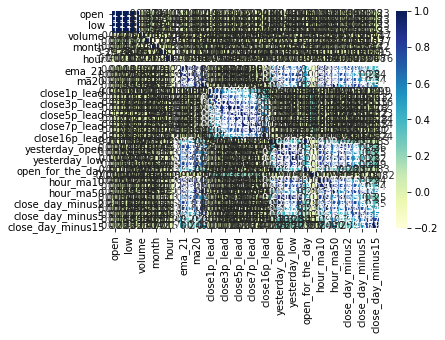

In [76]:
# Visualizing the data using heatmap
sns.heatmap(df_daily_all.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [77]:
### GET THE OVERALL MARKET
requestResponse = requests.get("https://api.tiingo.com/iex/"+"SPY"+"/prices?startDate=2019-01-02&resampleFreq=1hour&columns=open,high,low,close,volume&token=0ed744c7db5ef348139953912e2f3cee79f4608b", headers=headers)
df_market = pd.DataFrame(requestResponse.json()) 
# Execute the function to get clean date without the public holidays
df_market = df_stock_preprocessing(df_market)
# Execute the function to get columns for year, month, day, hour and mins
df_market = calculate_datetimes(df_market)
df_market = df_ind_fast_calc(df_market)
df_market = df_market.set_axis(['date', 'spy_open', 'spy_high', 'spy_low', 'spy_close', 'spy_volume', 'year', 'month',
   'day', 'hour', 'mins', 'spy_ema_21', 'spy_ma10', 'spy_ma20', 'spy_ma50', 'spy_close1p_lead',
   'spy_close2p_lead', 'spy_close3p_lead', 'spy_close4p_lead', 'spy_close5p_lead',
   'spy_close6p_lead', 'spy_close7p_lead', 'spy_close8p_lead', 'spy_close16p_lead',
   'spy_daily_open', 'spy_yesterday_open', 'spy_yesterday_close', 'spy_yesterday_low',
   'spy_yesterday_high', 'spy_open_for_the_day', 'spy_close_for_the_day', 'spy_hour_ma10',
   'spy_hour_ma20', 'spy_hour_ma50','spy_close_day_minus1', 'spy_close_day_minus2',
       'spy_close_day_minus3', 'spy_close_day_minus5', 'spy_close_day_minus10','spy_close_day_minus15'], axis=1, inplace=False)  


In [43]:
### GET THE OVERALL MARKET
requestResponse = requests.get("https://api.tiingo.com/iex/"+"SPY"+"/prices?startDate=2019-01-02&resampleFreq=15min&columns=open,high,low,close,volume&token=0ed744c7db5ef348139953912e2f3cee79f4608b", headers=headers)
df_market = pd.DataFrame(requestResponse.json()) 
# Execute the function to get clean date without the public holidays
df_market = df_stock_preprocessing(df_market)
# Execute the function to get columns for year, month, day, hour and mins
df_market = calculate_datetimes(df_market)
df_market = df_ind_fast_calc(df_market)
df_market = df_market.set_axis(['date', 'spy_open', 'spy_high', 'spy_low', 'spy_close', 'spy_volume', 'year', 'month',
   'day', 'hour', 'mins', 'spy_ema_21', 'spy_ma10', 'spy_ma20', 'spy_ma50', 'spy_close1p_lead',
   'spy_close2p_lead', 'spy_close3p_lead', 'spy_close4p_lead', 'spy_close5p_lead',
   'spy_close6p_lead', 'spy_close7p_lead', 'spy_close8p_lead', 'spy_close16p_lead',
   'spy_daily_open', 'spy_yesterday_open', 'spy_yesterday_close', 'spy_yesterday_low',
   'spy_yesterday_high', 'spy_open_for_the_day', 'spy_close_for_the_day', 'spy_hour_ma10',
   'spy_hour_ma20', 'spy_hour_ma50','spy_close_day_minus1', 'spy_close_day_minus2',
       'spy_close_day_minus3', 'spy_close_day_minus5', 'spy_close_day_minus10','spy_close_day_minus15'], axis=1, inplace=False)  


In [78]:
df_market.columns

Index(['date', 'spy_open', 'spy_high', 'spy_low', 'spy_close', 'spy_volume',
       'year', 'month', 'day', 'hour', 'mins', 'spy_ema_21', 'spy_ma10',
       'spy_ma20', 'spy_ma50', 'spy_close1p_lead', 'spy_close2p_lead',
       'spy_close3p_lead', 'spy_close4p_lead', 'spy_close5p_lead',
       'spy_close6p_lead', 'spy_close7p_lead', 'spy_close8p_lead',
       'spy_close16p_lead', 'spy_daily_open', 'spy_yesterday_open',
       'spy_yesterday_close', 'spy_yesterday_low', 'spy_yesterday_high',
       'spy_open_for_the_day', 'spy_close_for_the_day', 'spy_hour_ma10',
       'spy_hour_ma20', 'spy_hour_ma50', 'spy_close_day_minus1',
       'spy_close_day_minus2', 'spy_close_day_minus3', 'spy_close_day_minus5',
       'spy_close_day_minus10', 'spy_close_day_minus15'],
      dtype='object')

In [79]:
df_daily_all= pd.merge(df_daily_all,df_market,on=['year','month','day','hour','mins'],how='left')


In [80]:
df_daily_all.shape

(3370039, 76)

In [81]:
df_daily_all.head()

,date_x,open,high,low,close,volume,ticker,year,month,day,...,spy_close_for_the_day,spy_hour_ma10,spy_hour_ma20,spy_hour_ma50,spy_close_day_minus1,spy_close_day_minus2,spy_close_day_minus3,spy_close_day_minus5,spy_close_day_minus10,spy_close_day_minus15
0,2019-01-02 15:00:00+00:00,155.140,157.190,154.575,156.850,85705.0,AAPL,2019,1,2,...,0.585216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-02 16:00:00+00:00,156.850,158.340,156.740,157.065,71070.0,AAPL,2019,1,2,...,0.567240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-02 17:00:00+00:00,157.065,158.395,156.925,158.160,45895.0,AAPL,2019,1,2,...,0.061917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-02 18:00:00+00:00,158.170,158.820,158.135,158.725,44166.0,AAPL,2019,1,2,...,-0.325564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-02 19:00:00+00:00,158.730,158.735,157.770,157.910,71703.0,AAPL,2019,1,2,...,0.203727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
check_cor = df_daily_all[df_daily_all['hour']==17]
check_cor  = check_cor[check_cor['mins']==0]

In [49]:
check_cor.shape

(192539, 71)

In [50]:
check_cor.columns

Index(['Unnamed: 0', 'date_x', 'open', 'high', 'low', 'close', 'volume',
       'ticker', 'year', 'month', 'day', 'hour', 'mins', 'ema_21', 'ma10',
       'ma20', 'ma50', 'close1p_lead', 'close2p_lead', 'close3p_lead',
       'close4p_lead', 'close5p_lead', 'close6p_lead', 'close7p_lead',
       'close8p_lead', 'close16p_lead', 'daily_open', 'yesterday_open',
       'yesterday_close', 'yesterday_low', 'yesterday_high',
       'open_for_the_day', 'close_for_the_day', 'hour_ma10', 'hour_ma20',
       'hour_ma50', 'date_y', 'spy_open', 'spy_high', 'spy_low', 'spy_close',
       'spy_volume', 'spy_ema_21', 'spy_ma10', 'spy_ma20', 'spy_ma50',
       'spy_close1p_lead', 'spy_close2p_lead', 'spy_close3p_lead',
       'spy_close4p_lead', 'spy_close5p_lead', 'spy_close6p_lead',
       'spy_close7p_lead', 'spy_close8p_lead', 'spy_close16p_lead',
       'spy_daily_open', 'spy_yesterday_open', 'spy_yesterday_close',
       'spy_yesterday_low', 'spy_yesterday_high', 'spy_open_for_the_day',
       '

In [51]:
check_cor

,Unnamed: 0,date_x,open,high,low,close,volume,ticker,year,month,...,spy_close_for_the_day,spy_hour_ma10,spy_hour_ma20,spy_hour_ma50,spy_close_day_minus1,spy_close_day_minus2,spy_close_day_minus3,spy_close_day_minus5,spy_close_day_minus10,spy_close_day_minus15
20,20,2021-02-12 17:00:00+00:00,134.320,134.495,134.315,134.335,15407.0,AAPL,2021,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,47,2021-02-16 17:00:00+00:00,133.070,133.420,132.910,133.380,56020.0,AAPL,2021,2,...,0.002548,NaN,NaN,NaN,-0.142515,NaN,NaN,NaN,NaN,NaN
74,74,2021-02-17 17:00:00+00:00,130.255,130.355,129.815,129.895,40530.0,AAPL,2021,2,...,0.477841,-0.406901,NaN,NaN,-0.477841,-0.617143,NaN,NaN,NaN,NaN
101,101,2021-02-18 17:00:00+00:00,128.340,128.360,127.900,128.105,65262.0,AAPL,2021,2,...,0.592117,-0.560706,-0.783143,NaN,-0.951859,-0.951859,-1.090497,NaN,NaN,NaN
128,128,2021-02-19 17:00:00+00:00,130.080,130.170,129.920,129.980,25384.0,AAPL,2021,2,...,-0.456615,0.260248,0.156525,NaN,0.162417,-0.200056,-0.200056,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5203708,9636,2022-03-28 17:00:00+00:00,20.935,20.945,20.880,20.885,1931.0,PBCT,2022,3,...,0.925652,0.006864,0.317772,0.964457,-0.152532,0.276403,1.768715,1.672501,8.306257,7.622383
5203735,9663,2022-03-29 17:00:00+00:00,21.245,21.290,21.230,21.275,1882.0,PBCT,2022,3,...,0.744248,0.527980,0.965342,1.896396,0.484761,1.268887,1.703927,1.893948,7.531337,10.214122
5203762,9690,2022-03-30 17:00:00+00:00,20.245,20.250,20.185,20.190,1360.0,PBCT,2022,3,...,-0.211490,-0.110947,0.493316,1.661258,-0.415999,0.817074,1.603793,3.558835,5.529980,7.505906
5203789,9717,2022-03-31 17:00:00+00:00,20.125,20.155,20.010,20.025,5011.0,PBCT,2022,3,...,-0.888525,-0.431035,-0.604759,0.623220,-0.478578,-1.101746,0.122835,1.337611,3.530359,7.322894


In [ ]:
check_cor1  = check_cor[check_cor['close_for_the_day']<-1]

In [ ]:
check_cor2  = check_cor[check_cor['close_for_the_day']>=-1]

In [ ]:
check_cor.ma20.hist(bins=100)

In [ ]:
check_cor[check_cor['ma20']>3.33].shape

In [ ]:
check_cor[check_cor['ma20']>2.33].shape

In [ ]:
check_cor1  = check_cor[check_cor['ma20']>3.33]
check_cor2  = check_cor[check_cor['ma20']<=3.33]

stats.ttest_ind(check_cor1["close_for_the_day"].dropna(), check_cor2["close_for_the_day"].dropna())

In [ ]:
check_cor1["close_for_the_day"].describe()

In [ ]:
check_cor2["close_for_the_day"].describe()

In [ ]:
check_cor[check_cor['ma20']>3.33].to_csv('ma20_bigger333.csv')

In [ ]:
from scipy import stats

In [ ]:
check_cor1

In [ ]:
check_cor2

In [ ]:
stats.ttest_ind(check_cor1["ma20"].dropna(), check_cor2["ma20"].dropna())

In [ ]:
stats.ttest_ind(check_cor1["ma20"].dropna(), check_cor["ma20"].dropna())

In [ ]:
check_cor1["ma20"].mean()

In [ ]:
check_cor1.to_csv("check_cor1.csv")

In [ ]:
check_cor2["ma20"].mean()

In [ ]:
check_cor["ma20"]

In [ ]:
check_cor2["ma20"]

In [ ]:
check_cor  = check_cor[check_cor['spy_daily_open']<0.5]
check_cor  = check_cor[check_cor['spy_daily_open']>-0.5]

In [ ]:
check_cor.shape

In [ ]:
check_cor.spy_open_for_the_day.describe()

In [ ]:
check_cor  = check_cor[check_cor['mins']==0]

In [ ]:
check_cor

In [ ]:
check_cor.close_for_the_day.describe()

In [ ]:
check_cor[check_cor['ma20']>2.5].close_for_the_day.describe()

In [ ]:
check_cor.to_csv("1900.csv")

In [ ]:
check_cor.corr().to_csv('cor_all.csv')

In [ ]:
#### PERFORMANCE 
def df_ind_fast_calc(df_input):
    combined_df = df_input.sort_values(['ticker','date'])
    #combined_df.set_index('date',inplace=True)
    # Mkt strenght
    combined_df['mkt_str'] = (combined_df.close-combined_df.open).apply(lambda x: 1 if x>=0 else 0).groupby('date').sum()/combined_df.groupby('date').ticker.nunique()
    combined_df['mkt_str_1_lag'] = combined_df.groupby('ticker').mkt_str.shift(1)
    combined_df['mkt_str_2_lag'] = combined_df.groupby('ticker').mkt_str.shift(2)
    combined_df['mkt_str_3_lag'] = combined_df.groupby('ticker').mkt_str.shift(3)
    combined_df['mkt_str_4_lag'] = combined_df.groupby('ticker').mkt_str.shift(4)
    combined_df['mkt_str_5_lag'] = combined_df.groupby('ticker').mkt_str.shift(5)

    ## Bollinger bands
    combined_df['bollinger_55_up'], combined_df['bollinger_55_down'], combined_df['ma55']  = get_bollinger_bands(combined_df.groupby('ticker').close, rate=55)/combined_df.close.values
    combined_df['bollinger_89_up'], combined_df['bollinger_80_down'], combined_df['ma89']  = get_bollinger_bands(combined_df.groupby('ticker').close, rate=89)/combined_df.close.values
    combined_df['bollinger_100_up'], combined_df['bollinger_100_down'], combined_df['ma100']  = get_bollinger_bands(combined_df.groupby('ticker').close, rate=100)/combined_df.close.values
    combined_df['bollinger_120_up'], combined_df['bollinger_120_down'], combined_df['ma120']  = get_bollinger_bands(combined_df.groupby('ticker').close, rate=120)/combined_df.close.values
    combined_df['bollinger_144_up'], combined_df['bollinger_144_down'], combined_df['ma144']  = get_bollinger_bands(combined_df.groupby('ticker').close, rate=144)/combined_df.close.values


    # Stock   
    combined_df['ema_21'] = (combined_df.groupby('ticker').close.ewm(span=21,adjust=False,min_periods=21).mean()/combined_df.close.values).values
    combined_df['ema_34'] = (combined_df.groupby('ticker').close.ewm(span=34,adjust=False,min_periods=34).mean()/combined_df.close.values).values
    combined_df['ema_55'] = (combined_df.groupby('ticker').close.ewm(span=55,adjust=False,min_periods=55).mean()/combined_df.close.values).values
    combined_df['ema_89'] = (combined_df.groupby('ticker').close.ewm(span=89,adjust=False,min_periods=89).mean()/combined_df.close.values).values
    #combined_df['ema_144'] = (combined_df.groupby('ticker').close.ewm(span=144,adjust=False,min_periods=144).mean()/combined_df.close.values).values

    # Technical indicators based on momentum
    #combined_df['macd'] = ((combined_df.groupby('ticker').close.ewm(span=12,adjust=False).mean() - combined_df.close.ewm(span=26,adjust=False).mean()).ewm(span=9,adjust=False).mean().values/combined_df.close.values).values  
    # Moving averages
    # Moving averages
    combined_df['ma7'] = (combined_df.groupby('ticker').close.rolling(window=7).mean()/combined_df.close.values).values
    combined_df['ma21'] = (combined_df.groupby('ticker').close.rolling(window=21).mean()/combined_df.close.values).values
    combined_df['ma25'] = (combined_df.groupby('ticker').close.rolling(window=25).mean()/combined_df.close.values).values
    combined_df['ma34'] = (combined_df.groupby('ticker').close.rolling(window=34).mean()/combined_df.close.values).values
 #   BELOW MA's are calculated as parts of the bollinger bands
 #   combined_df['ma55'] = (combined_df.groupby('ticker').close.rolling(window=55).mean()/combined_df.close.values).values
 #   combined_df['ma89'] = (combined_df.groupby('ticker').close.rolling(window=89).mean()/combined_df.close.values).values
 #   combined_df['ma100'] = (combined_df.groupby('ticker').close.rolling(window=100).mean()/combined_df.close.values).values
 #   combined_df['ma120'] = (combined_df.groupby('ticker').close.rolling(window=120).mean()/combined_df.close.values).values
 #   combined_df['ma150'] = (combined_df.groupby('ticker').close.rolling(window=150).mean()/combined_df.close.values).values
    # Distance from close to max in various points of time    
    combined_df['max5d'] = (combined_df.groupby('ticker').high.rolling(window=5).max()/combined_df.close.values).values
    combined_df['max10d'] = (combined_df.groupby('ticker').high.rolling(window=10).max()/combined_df.close.values).values
    combined_df['max15d'] = (combined_df.groupby('ticker').high.rolling(window=15).max()/combined_df.close.values).values
    combined_df['max20d'] = (combined_df.groupby('ticker').high.rolling(window=20).max()/combined_df.close.values).values
    combined_df['max25d'] = (combined_df.groupby('ticker').high.rolling(window=25).max()/combined_df.close.values).values
    combined_df['max30d'] = (combined_df.groupby('ticker').high.rolling(window=30).max()/combined_df.close.values).values
    combined_df['max45d'] = (combined_df.groupby('ticker').high.rolling(window=45).max()/combined_df.close.values).values
    combined_df['max70d'] = (combined_df.groupby('ticker').high.rolling(window=70).max()/combined_df.close.values).values
    combined_df['max85d'] = (combined_df.groupby('ticker').high.rolling(window=85).max()/combined_df.close.values).values
    combined_df['max100d'] = (combined_df.groupby('ticker').high.rolling(window=100).max()/combined_df.close.values).values
    combined_df['max120d'] = (combined_df.groupby('ticker').high.rolling(window=120).max()/combined_df.close.values).values
    combined_df['max150d'] = (combined_df.groupby('ticker').high.rolling(window=150).max()/combined_df.close.values).values

    # Distance from close to min in various points of time
    combined_df['min5d'] = (combined_df.groupby('ticker').low.rolling(window=5).min()/combined_df.close.values).values
    combined_df['min10d'] = (combined_df.groupby('ticker').low.rolling(window=10).min()/combined_df.close.values).values
    combined_df['min15d'] = (combined_df.groupby('ticker').low.rolling(window=15).min()/combined_df.close.values).values
    combined_df['min20d'] = (combined_df.groupby('ticker').low.rolling(window=20).min()/combined_df.close.values).values
    combined_df['min25d'] = (combined_df.groupby('ticker').low.rolling(window=25).min()/combined_df.close.values).values
    combined_df['min30d'] = (combined_df.groupby('ticker').low.rolling(window=30).min()/combined_df.close.values).values
    combined_df['min45d'] = (combined_df.groupby('ticker').low.rolling(window=45).min()/combined_df.close.values).values
    combined_df['min70d'] = (combined_df.groupby('ticker').low.rolling(window=70).min()/combined_df.close.values).values
    combined_df['min85d'] = (combined_df.groupby('ticker').low.rolling(window=85).min()/combined_df.close.values).values
    combined_df['min100d'] = (combined_df.groupby('ticker').low.rolling(window=100).min()/combined_df.close.values).values
    combined_df['min120d'] = (combined_df.groupby('ticker').low.rolling(window=120).min()/combined_df.close.values).values
    combined_df['min150d'] = (combined_df.groupby('ticker').low.rolling(window=150).min()/combined_df.close.values).values

    # Last 
    combined_df['low_to_close'] = (combined_df.low/combined_df.close.values).values
    combined_df['high_to_close'] = (combined_df.high/combined_df.close.values).values
    combined_df['open_to_close'] = (combined_df.open/combined_df.close.values).values
    combined_df['close_lag1'] = (combined_df.groupby('ticker').close.shift(1)/combined_df.close.values).values
    combined_df['close_lag2'] = (combined_df.groupby('ticker').close.shift(2)/combined_df.close.values).values
    combined_df['close_lag3'] = (combined_df.groupby('ticker').close.shift(3)/combined_df.close.values).values
    combined_df['close_low_1'] = (combined_df.groupby('ticker').low.shift(1)/combined_df.close.values).values
    combined_df['close_low_2'] = (combined_df.groupby('ticker').low.shift(2)/combined_df.close.values).values
    combined_df['close_low_3'] = (combined_df.groupby('ticker').low.shift(3)/combined_df.close.values).values
    combined_df['close_high_1'] = (combined_df.groupby('ticker').high.shift(1)/combined_df.close.values).values
    combined_df['close_high_2'] = (combined_df.groupby('ticker').high.shift(2)/combined_df.close.values).values
    combined_df['close_high_3'] = (combined_df.groupby('ticker').high.shift(3)/combined_df.close.values).values
    combined_df['close_open_1'] = (combined_df.groupby('ticker').open.shift(1)/combined_df.close.values).values
    combined_df['close_open_2'] = (combined_df.groupby('ticker').open.shift(2)/combined_df.close.values).values
    combined_df['close_open_3'] = (combined_df.groupby('ticker').open.shift(3)/combined_df.close.values).values
    # To use as targets
#    combined_df['close1d_min'] = (combined_df.groupby('ticker').low.shift(-1)/combined_df.close.values).values
#    combined_df['close2d_min'] = (combined_df.groupby('ticker').low.shift(-2).rolling(window=2).min()/combined_df.close.values).values
#    combined_df['close3d_min'] = (combined_df.groupby('ticker').low.shift(-3).rolling(window=3).min()/combined_df.close.values).values
#    combined_df['close4d_min'] = (combined_df.groupby('ticker').low.shift(-4).rolling(window=4).min()/combined_df.close.values).values
#    combined_df['close5d_min'] = (combined_df.groupby('ticker').low.shift(-5).rolling(window=4).min()/combined_df.close.values).values

#    combined_df['close1d_max'] = (combined_df.groupby('ticker').high.shift(-1)/combined_df.close.values).values
#    combined_df['close2d_max'] = (combined_df.groupby('ticker').high.shift(-2).rolling(window=2).max()/combined_df.close.values).values
#    combined_df['close3d_max'] = (combined_df.groupby('ticker').high.shift(-3).rolling(window=3).max()/combined_df.close.values).values
#    combined_df['close4d_max'] = (combined_df.groupby('ticker').high.shift(-4).rolling(window=4).max()/combined_df.close.values).values
#    combined_df['close5d_max'] = (combined_df.groupby('ticker').high.shift(-5).rolling(window=5).max()/combined_df.close.values).values

    
    combined_df['close1d_lead'] = (combined_df.groupby('ticker').close.shift(-1)/combined_df.close.values).values
    combined_df['close2d_lead'] = (combined_df.groupby('ticker').close.shift(-2)/combined_df.close.values).values
    combined_df['close3d_lead'] = (combined_df.groupby('ticker').close.shift(-3)/combined_df.close.values).values    
    combined_df['close4d_lead'] = (combined_df.groupby('ticker').close.shift(-4)/combined_df.close.values).values    
    combined_df['close5d_lead'] = (combined_df.groupby('ticker').close.shift(-5)/combined_df.close.values).values    
    combined_df['close6d_lead'] = (combined_df.groupby('ticker').close.shift(-6)/combined_df.close.values).values    

    
    return combined_df




In [ ]:
requestResponse = requests.get("https://api.tiingo.com/iex/aapl/prices?startDate=2019-01-02&resampleFreq=1hour&columns=open,high,low,close,volume&token=0ed744c7db5ef348139953912e2f3cee79f4608b", headers=headers)
print(requestResponse.json())
df_stock = pd.DataFrame(requestResponse.json()) 

In [ ]:
df_stock

In [ ]:
df_stock.to_csv("df_stock_1h.csv")

In [ ]:
requestResponse = requests.get("https://api.tiingo.com/tiingo/daily/aapl/prices?startDate=2019-01-02&token=0ed744c7db5ef348139953912e2f3cee79f4608b", headers=headers)
print(requestResponse.json())

In [ ]:
df_stock = pd.DataFrame(requestResponse.json()) 

In [ ]:
df_stock

In [ ]:
pd.to_datetime(df_stock['date']) + pd.DateOffset(days=-180)

In [ ]:
pd.to_datetime()